# <font size = 6> **Importações**

## <font size=5, color="orange"> **Bibliotecas**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## <font size=5, color="orange"> **Banco de dados**

In [46]:
!gdown 1aFSW3w4sgOIJdXvUni8Dv_DsIjVGBpRp --quiet
df_geral = pd.read_csv('pacigeral_set24.csv')

tipos = ['mama', 'próstata', 'pulmão', 'colorretal', 'colo de útero']

topografias = {'mama':['C50'], 'próstata':['C61'], 'pulmão':['C34'], 'colorretal': ['C18', 'C19', 'C20'], 'colo de útero': ['C53']}

bancos = {}

for tipo in tipos:
    bancos[tipo] = df_geral[df_geral.TOPOGRUP.isin(topografias[tipo])]

for banco in bancos:
    print(banco, bancos[banco].shape)

<ipython-input-46-254dd39134c0>:2: DtypeWarning: Columns (24,25,26,33,37,79,90,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df_geral = pd.read_csv('pacigeral_set24.csv')


mama (170413, 105)
próstata (128575, 105)
pulmão (57620, 105)
colorretal (90625, 105)
colo de útero (56912, 105)


In [47]:
print(df_geral.shape)

(1233793, 105)


In [48]:
print(df_geral['TOPOGRUP'].unique())

['C22' 'C44' 'C61' 'C20' 'C18' 'C02' 'C62' 'C53' 'C41' 'C34' 'C50' 'C56'
 'C42' 'C54' 'C77' 'C64' 'C01' 'C16' 'C80' 'C00' 'C55' 'C24' 'C19' 'C32'
 'C71' 'C11' 'C25' 'C69' 'C09' 'C38' 'C13' 'C10' 'C74' 'C67' 'C76' 'C15'
 'C30' 'C48' 'C21' 'C31' 'C73' 'C72' 'C12' 'C17' 'C65' 'C23' 'C40' 'C49'
 'C57' 'C37' 'C52' 'C06' 'C51' 'C05' 'C66' 'C07' 'C70' 'C08' 'C60' 'C03'
 'C33' 'C75' 'C63' 'C47' 'C04' 'C14' 'C26' 'C68' 'C58' 'C39']


In [49]:
print(df_geral['DESCMORFO'].nunique())

787


In [50]:
print(df_geral['MORFO'].nunique())

767


#<font size = 6> **Exibição das colunas**

In [51]:
# Quais colunas pré-selecionadas não serão exibidas
ls_except_p = ['INSTITU','IBGE','CONSDIAG','TRATCONS','DIAGTRAT','DSCINST','IBGEATEN','DRS_INST','RRAS_INST','ULTIDIAG', 'meses_diag']

# Quais, de todas as colunas, não serão exibidas
ls_except_t = ['INSTITU','UFNASC','UFRESID','IBGE','CIDADE','DTCONSULT','DTDIAG','DESCTOPO','DESCMORFO','OUTRACLA','DTTRAT','DTULTINFO',
               'CONSDIAG','TRATCONS','DIAGTRAT','CICI','CICIGRUP','CICISUBGRU','FAIXAETAR','INSTORIG','DTRECIDIVA','DSCINST','IBGEATEN',
               'CIDO','DSCCIDO','HABIT11','CIDADEH','CIDADE_INS']

def exibe_df(df, col):

    if(col == 'p'):
        ls_except = ls_except_p
    elif(col == 't'):
        ls_except = ls_except_t
        # Análise de dados faltantes
        dt = df.isnull().sum()
        dp = df.isnull().mean() * 100
        ls = dt.keys()
        if(dt.sum() ==0):
            print("Não há dados faltantes\n")
        else:
            print("Análise de dados faltantes\n")
        for i in ls:
            if dt[i] > 0:
                print(i)
                print(f'Quantidade de missings: {dt[i]} ou \t{dp[i]:.2f}%')
                print("\n")

    for i in range(len(df.columns)):
        font = 10
        rot  = 0

        # Verifica se a coluna em análise precisa ou não ser exibida
        if(df.columns[i] in ls_except):
            continue

        # Obtem o valor absoluto da frequência daquela variável e ordena as categorias em ordem crescente
        freq = df[df.columns[i]].value_counts()

        # Obtem quantas categorias aquela coluna possui
        num_cat = df[df.columns[i]].nunique()

        # Ajusta o gráfico visualmente conforme a quantidade de categorias da coluna
        if(num_cat >= 8):
            plt.figure(figsize=(15,6))
            font = 8

        if(num_cat >= 17):
            plt.figure(figsize=(15,6))
            font = 8
            rot  = 45

        if(num_cat >= 30):
            plt.figure(figsize=(20,6))
            font = 8
            rot  = 45

        # Cria o gráfico de barras
        freq.plot(kind="bar", color="skyblue", edgecolor="black")

        # Exibe a frequência de cada categoria em porcentagem
        for i, v in enumerate(freq):
            plt.text(i, v + (200*v/27000), f"{((v/df.shape[0])*100):.2f}%", ha="center", fontsize=font)

        # Exibe o gráfico
        plt.xticks(rotation=rot, ha="right")
        plt.ylabel("Frequência")
        plt.title("Frequência das Categorias")
        plt.show()
        print("\n")

## <font size=6, color="orange"> **Banco geral**

Análise de dados faltantes

DESCMORFO
Quantidade de missings: 4 ou 	0.00%


PT
Quantidade de missings: 712293 ou 	57.73%


PN
Quantidade de missings: 718802 ou 	58.26%


PM
Quantidade de missings: 751343 ou 	60.90%


OUTRACLA
Quantidade de missings: 1161216 ou 	94.12%


META01
Quantidade de missings: 1066968 ou 	86.48%


META02
Quantidade de missings: 1178328 ou 	95.50%


META03
Quantidade de missings: 1214225 ou 	98.41%


META04
Quantidade de missings: 1227612 ou 	99.50%


DTTRAT
Quantidade de missings: 99755 ou 	8.09%


DTULTINFO
Quantidade de missings: 1 ou 	0.00%


TRATCONS
Quantidade de missings: 99755 ou 	8.09%


DIAGTRAT
Quantidade de missings: 99755 ou 	8.09%


CICI
Quantidade de missings: 1202192 ou 	97.44%


CICIGRUP
Quantidade de missings: 1202192 ou 	97.44%


CICISUBGRU
Quantidade de missings: 1202192 ou 	97.44%


INSTORIG
Quantidade de missings: 1233078 ou 	99.94%


DRS
Quantidade de missings: 85714 ou 	6.95%


DTRECIDIVA
Quantidade de missings: 1106114 ou 	89.65%


REC01


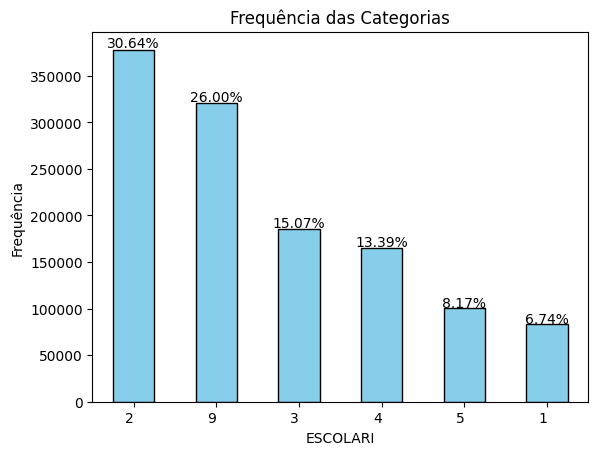

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

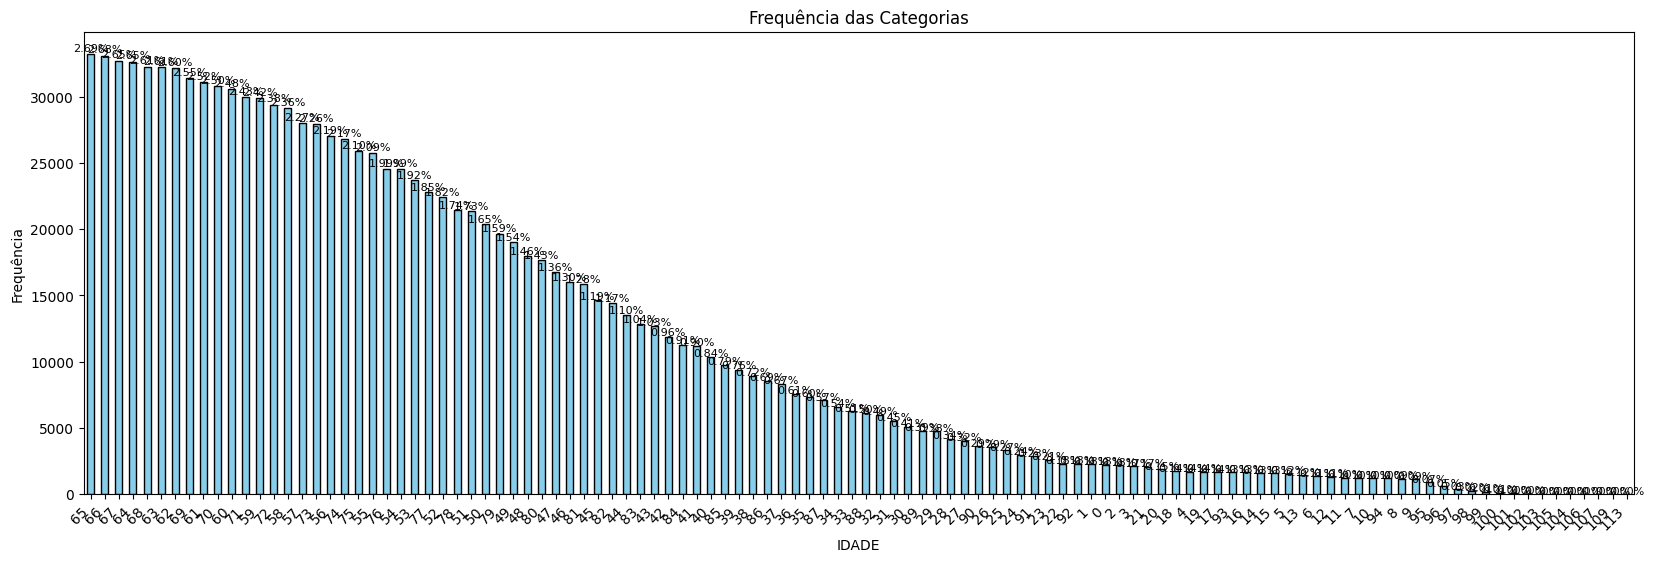

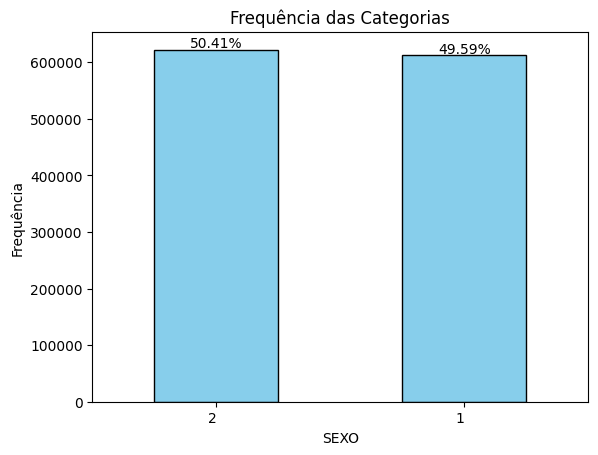

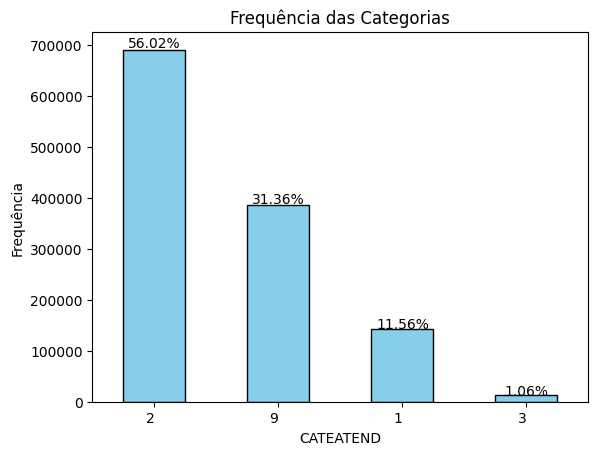

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

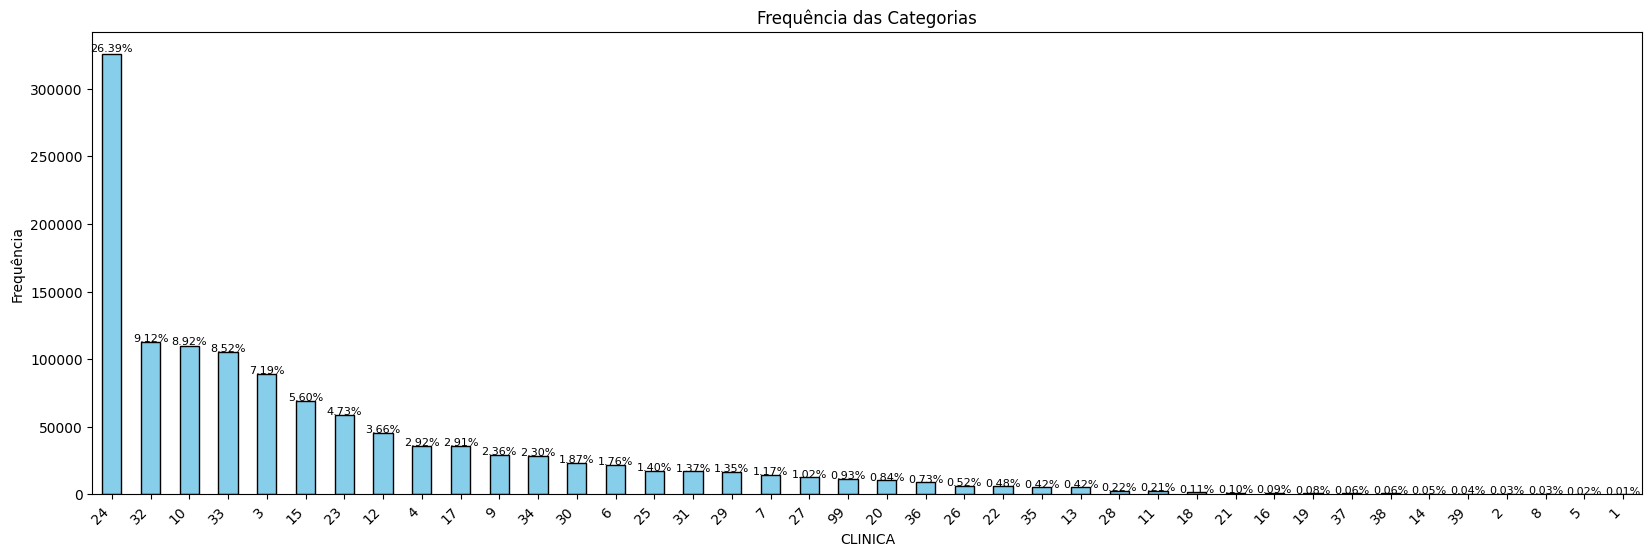

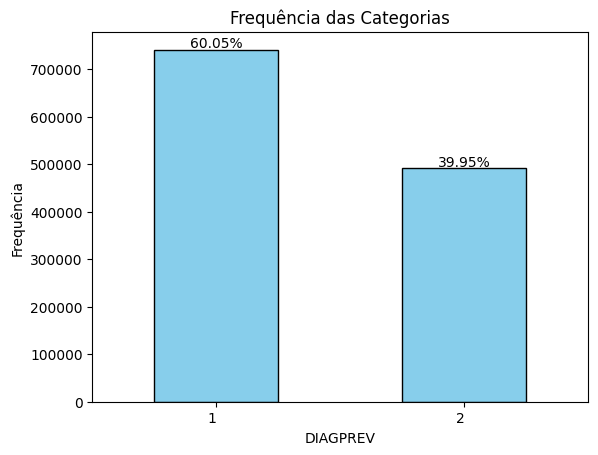

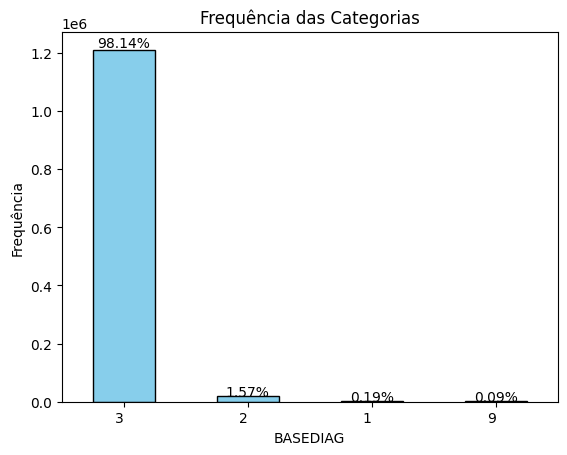

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

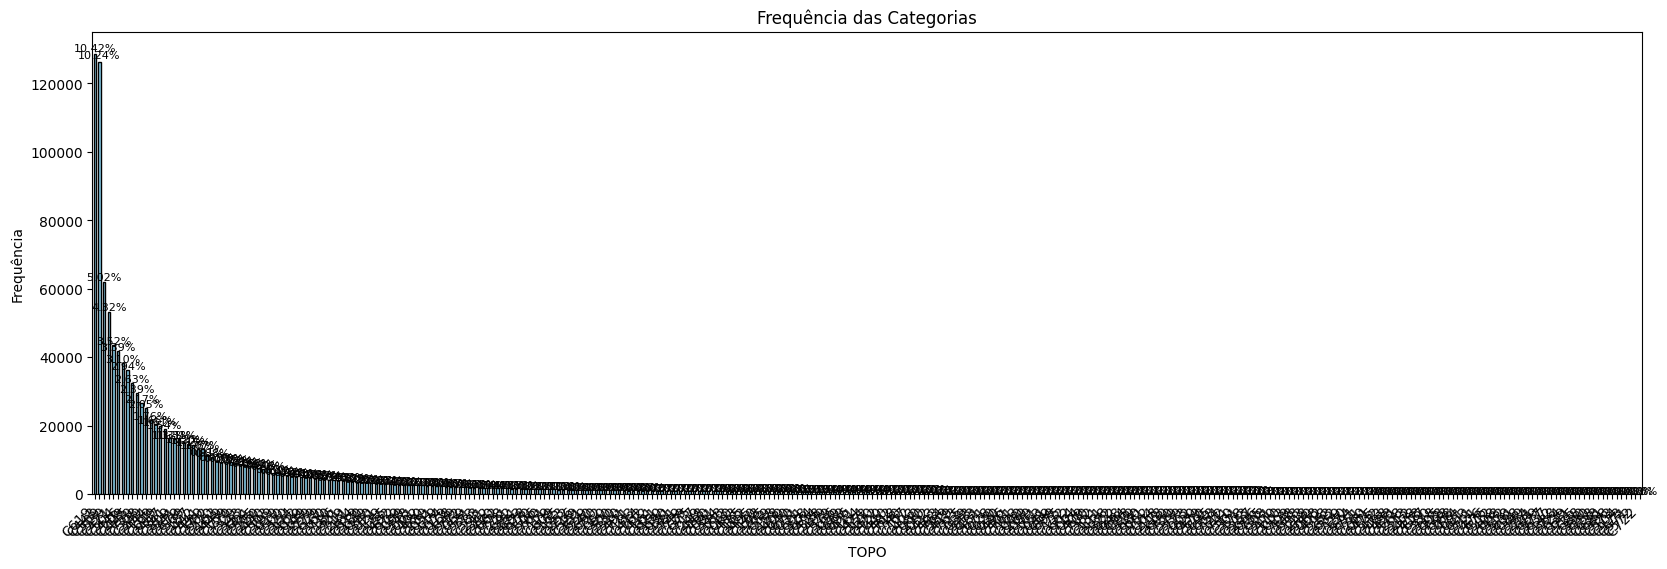

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

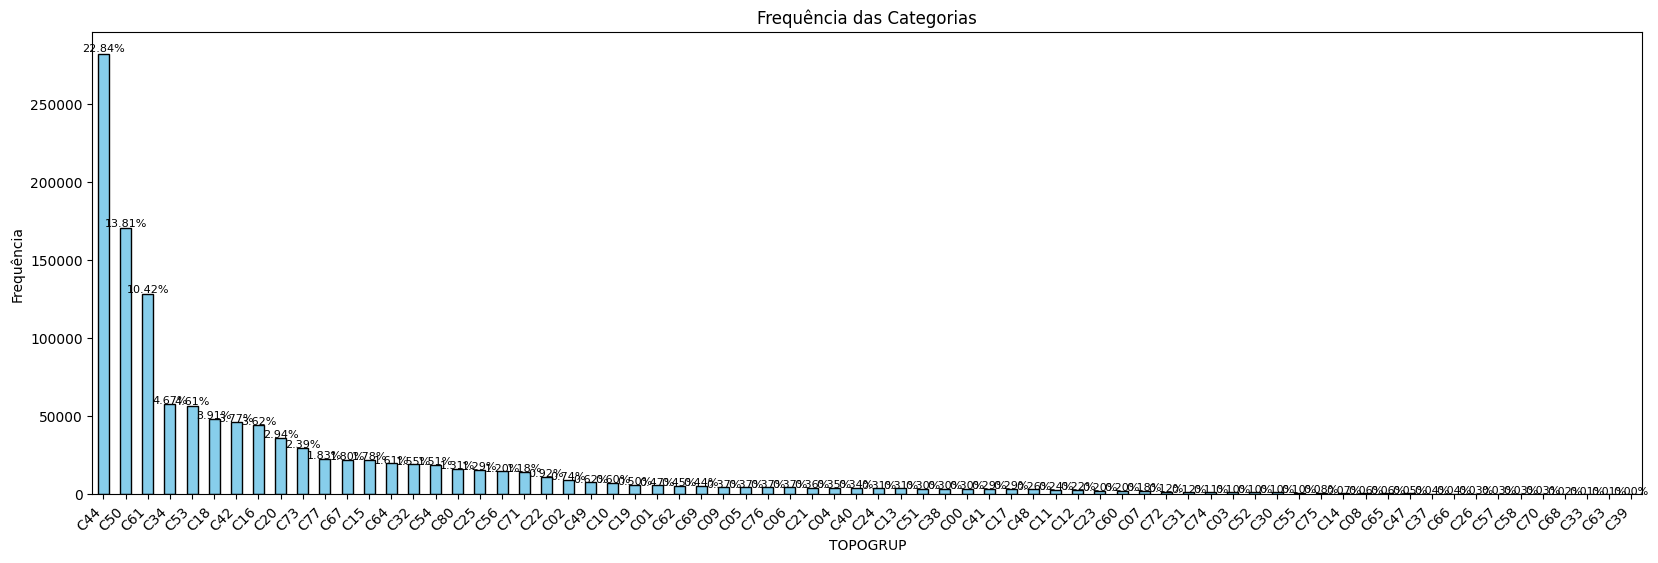

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

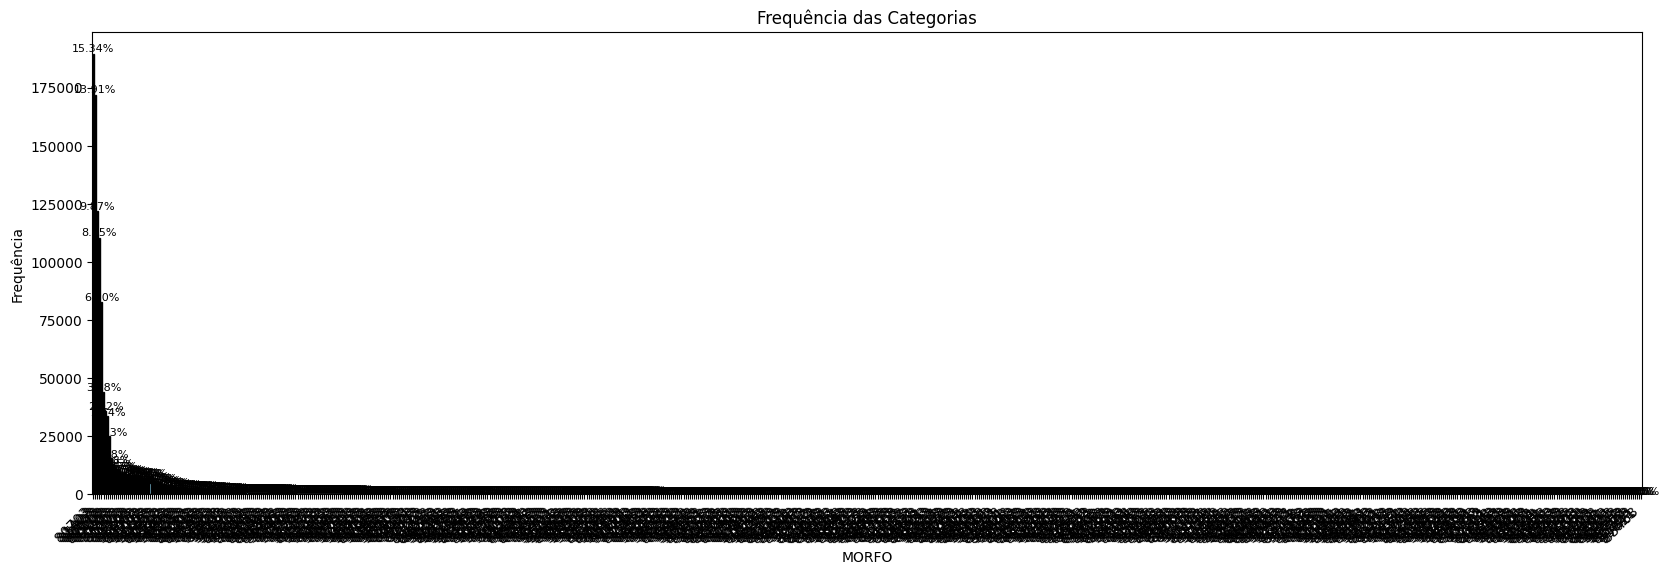

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

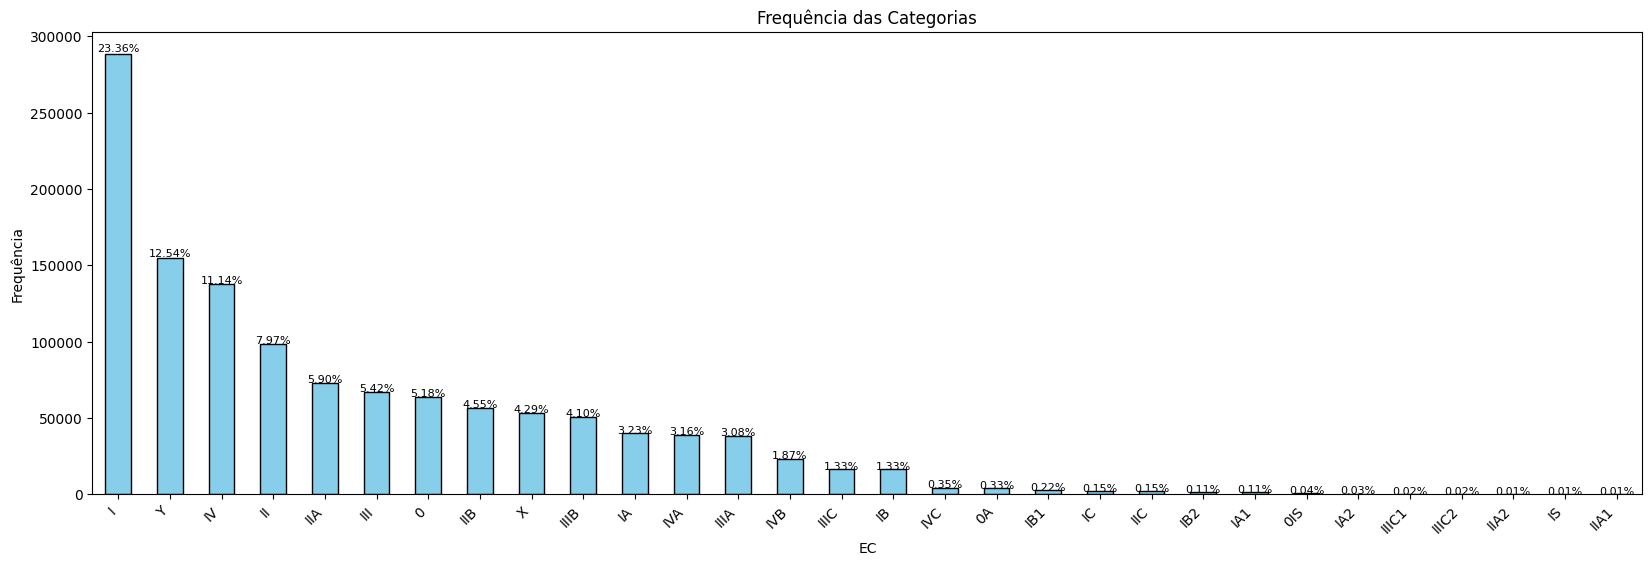

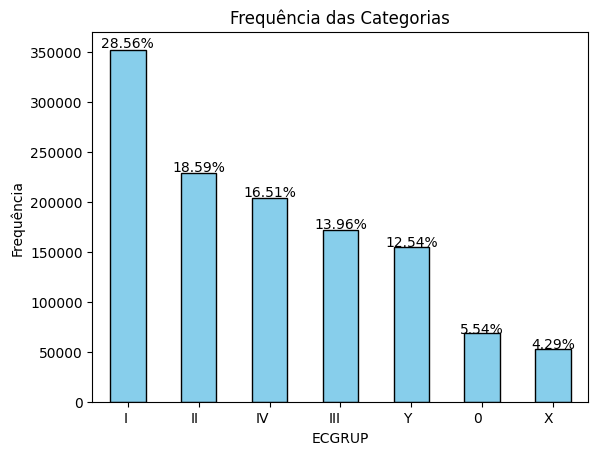

<Figure size 1500x600 with 0 Axes>

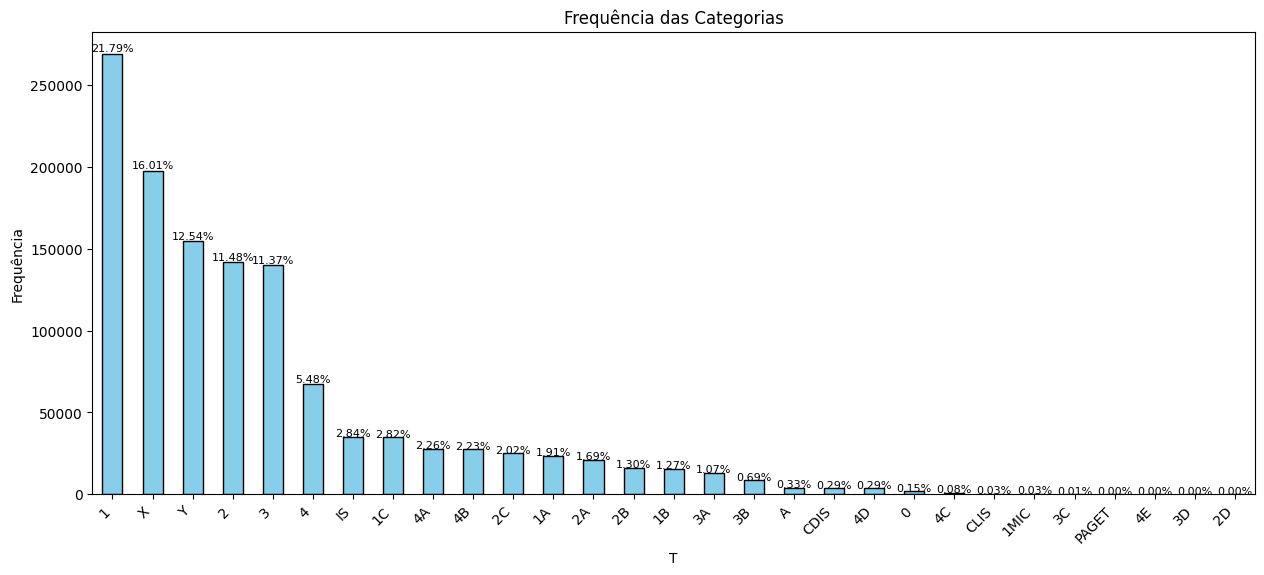

<Figure size 1500x600 with 0 Axes>

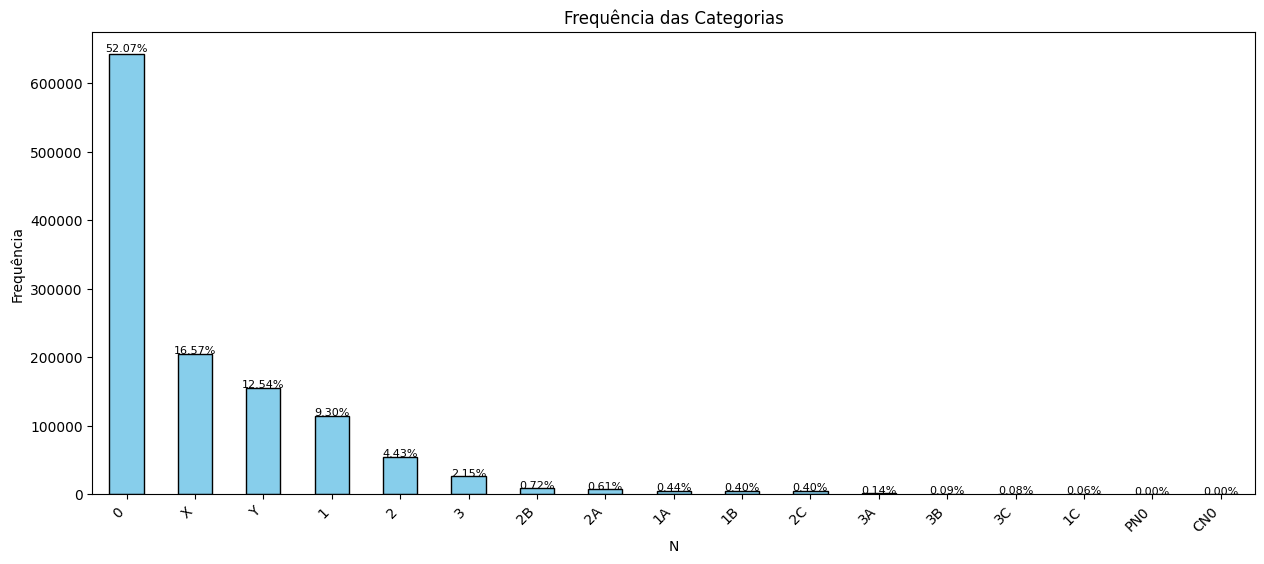

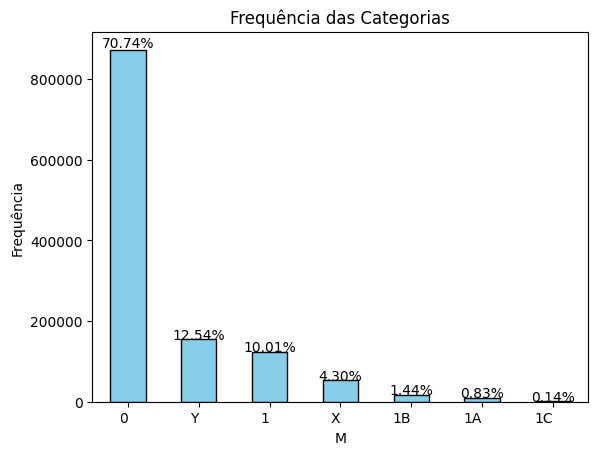

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

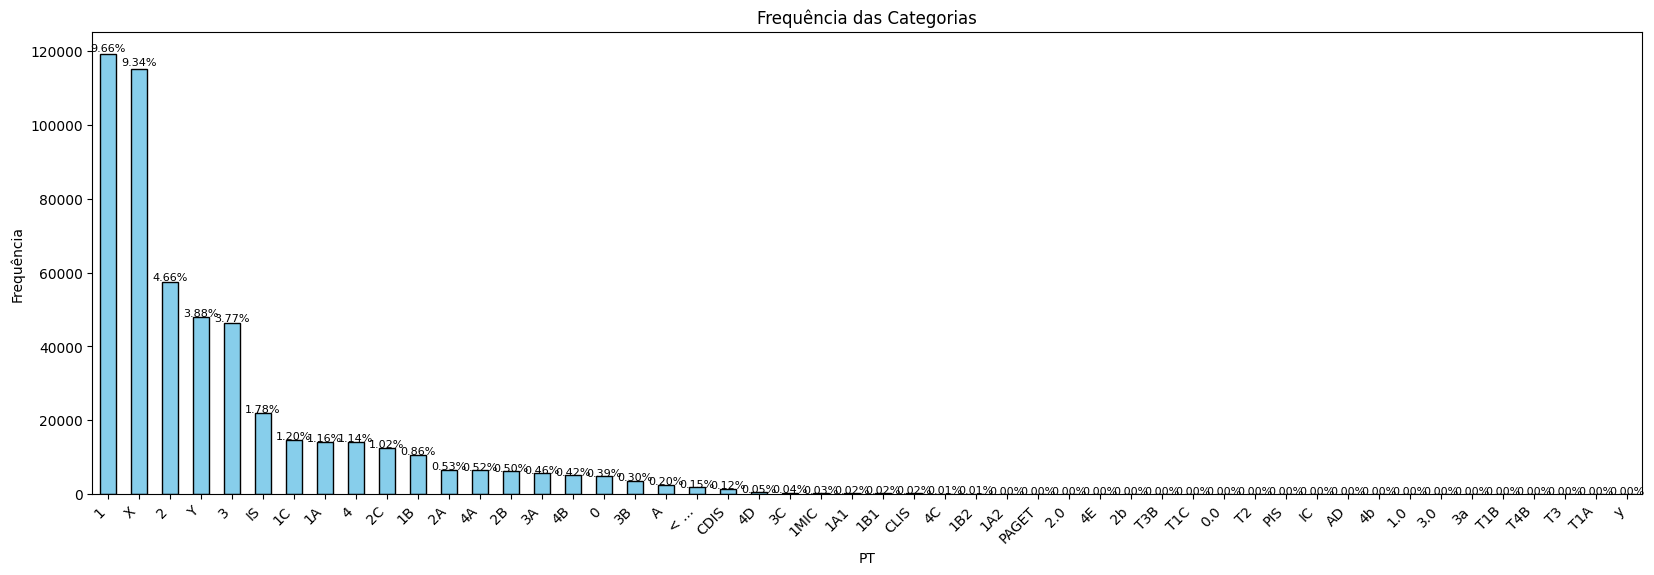

<Figure size 1500x600 with 0 Axes>

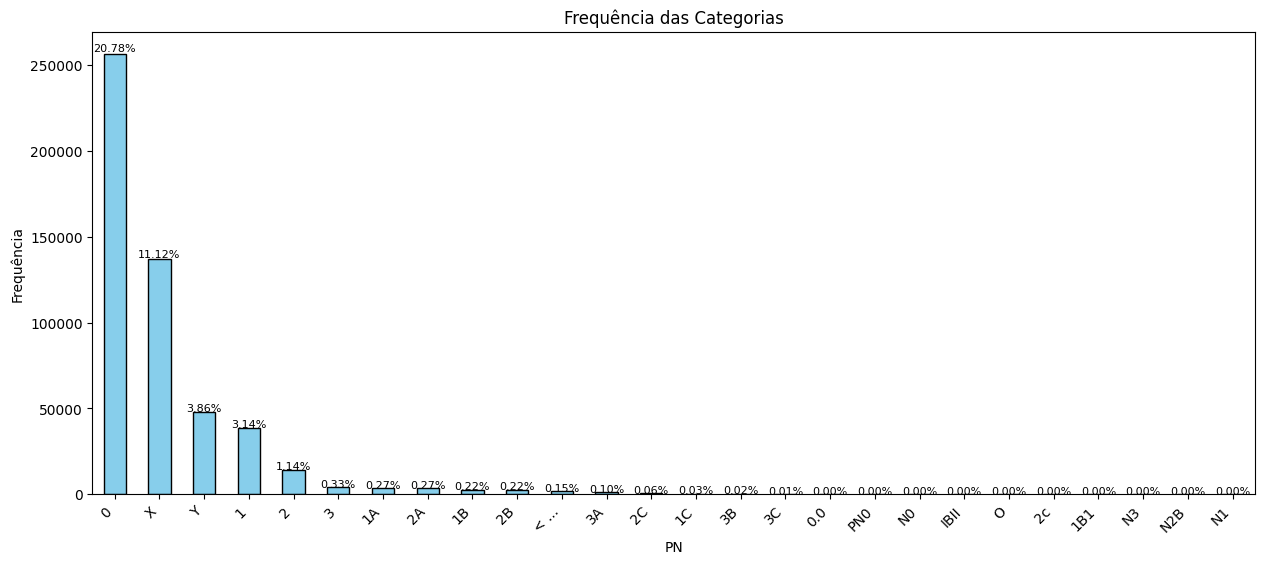

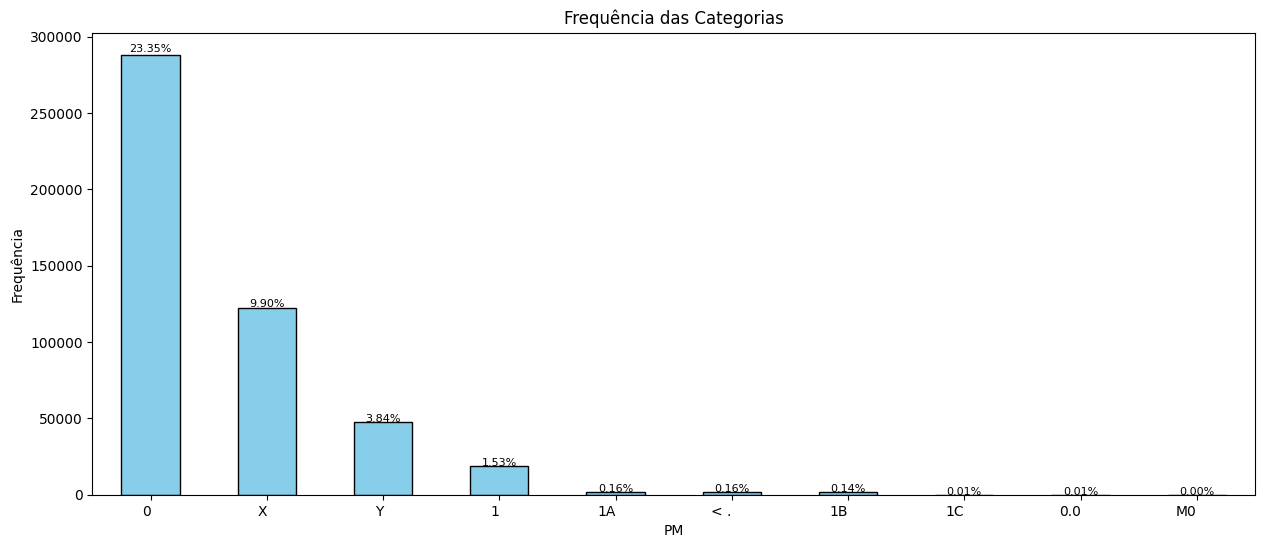

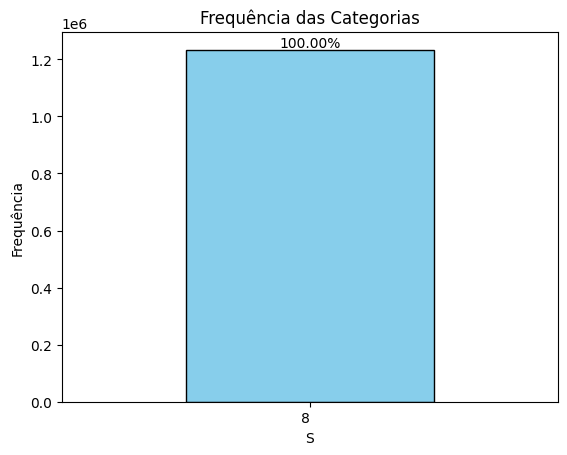

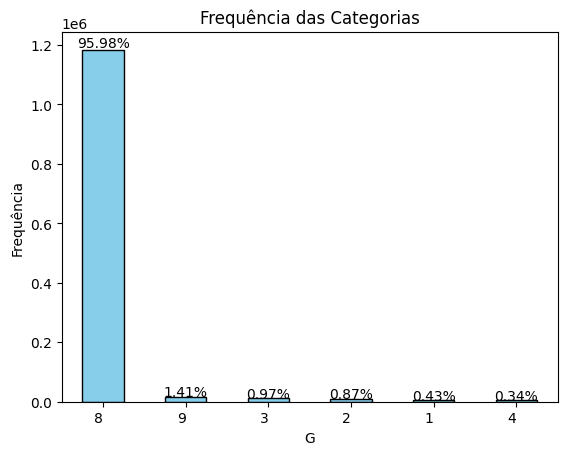

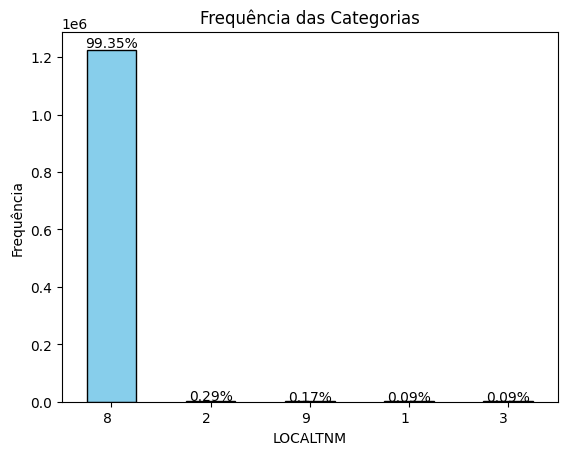

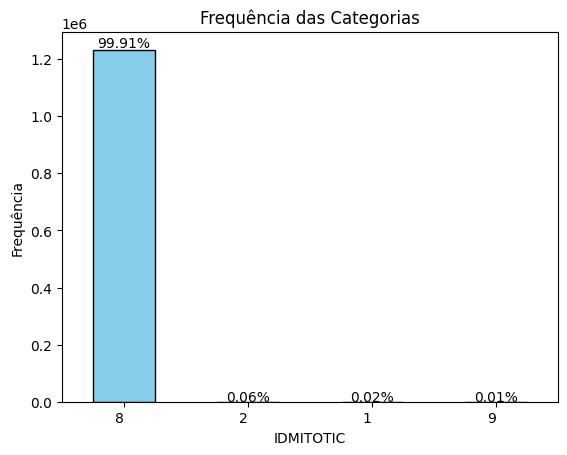

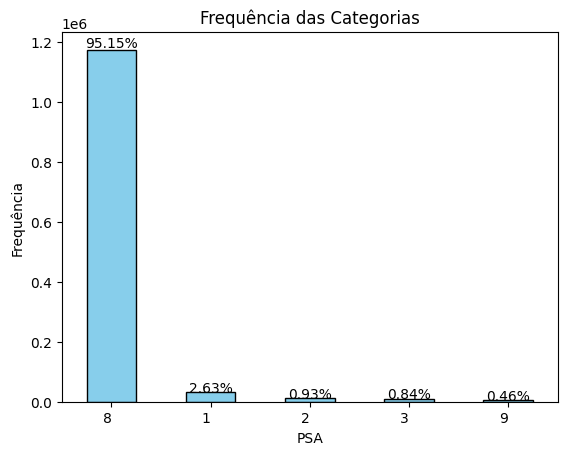

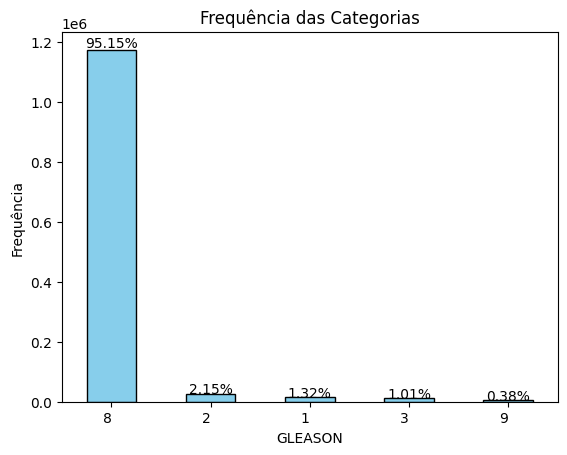

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

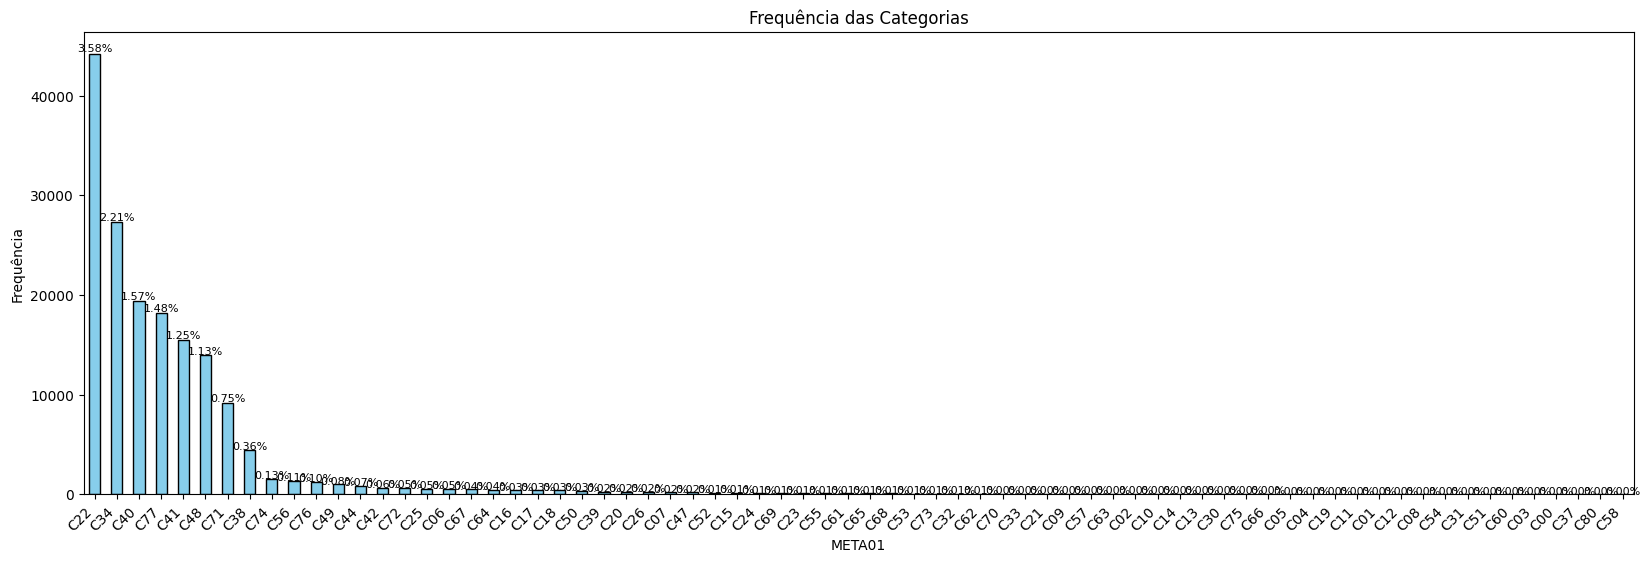

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

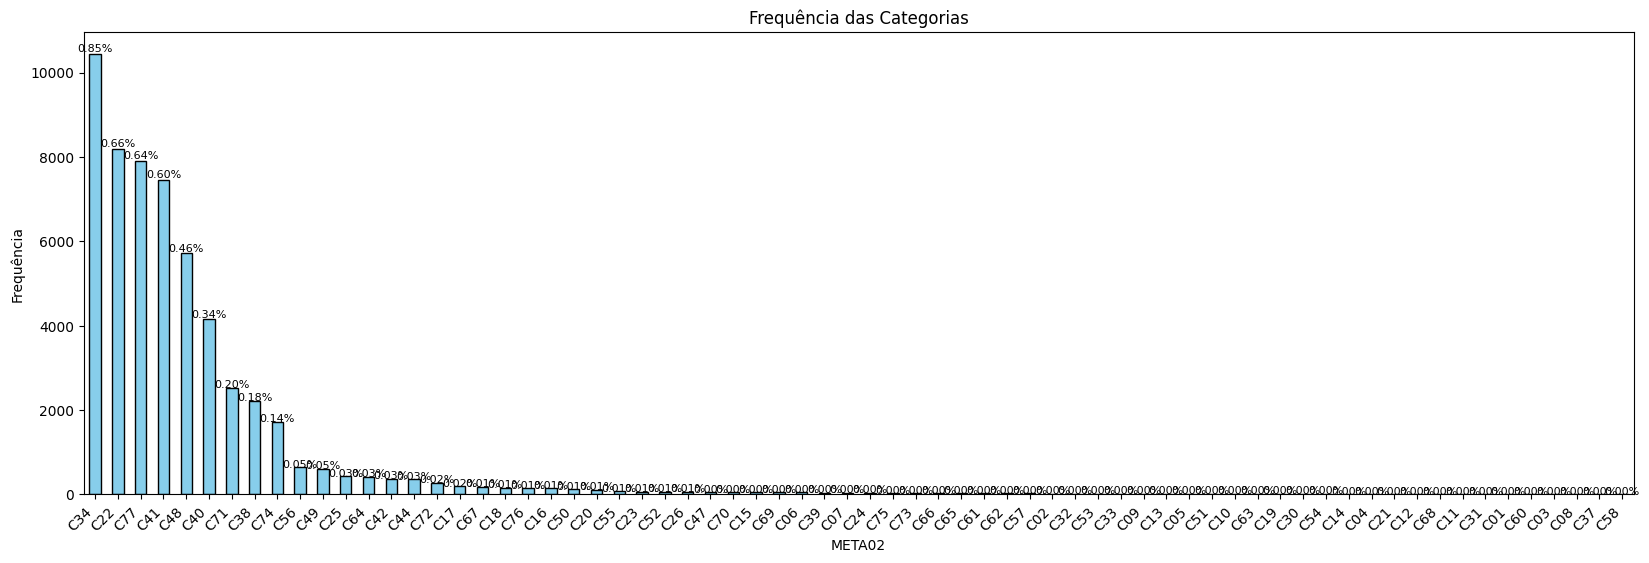

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

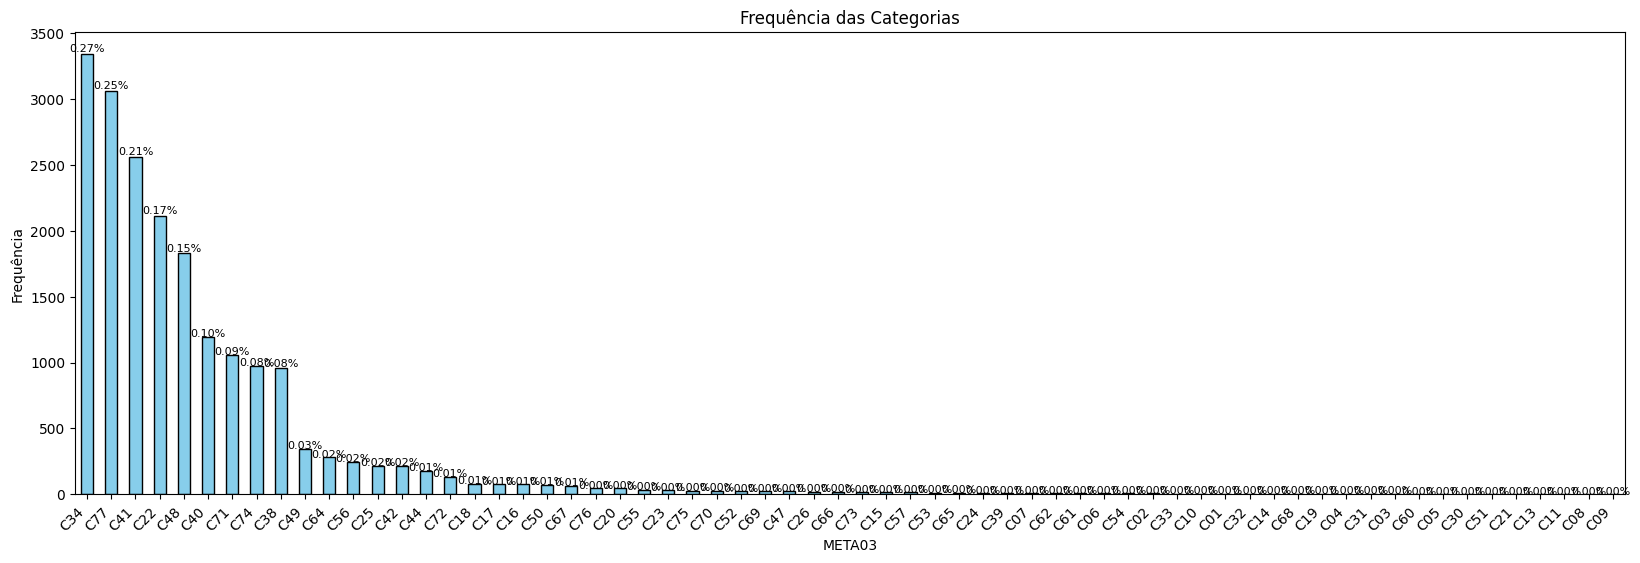

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

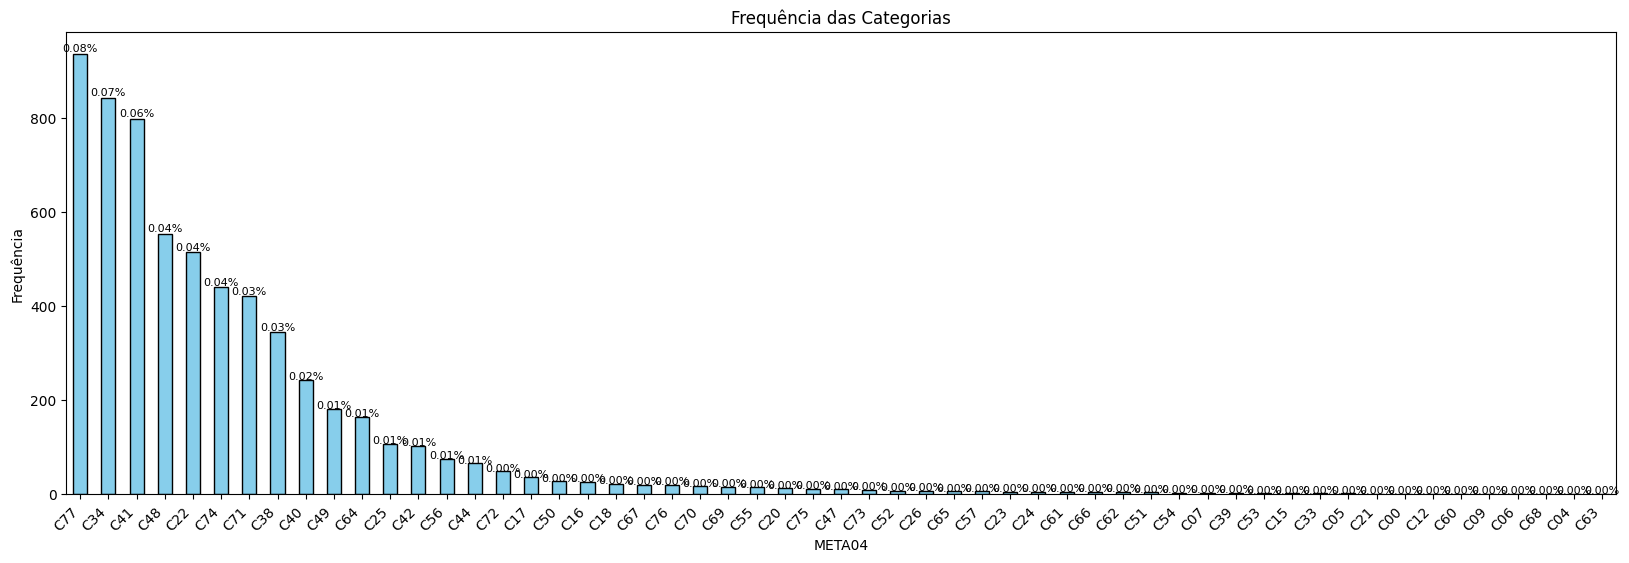

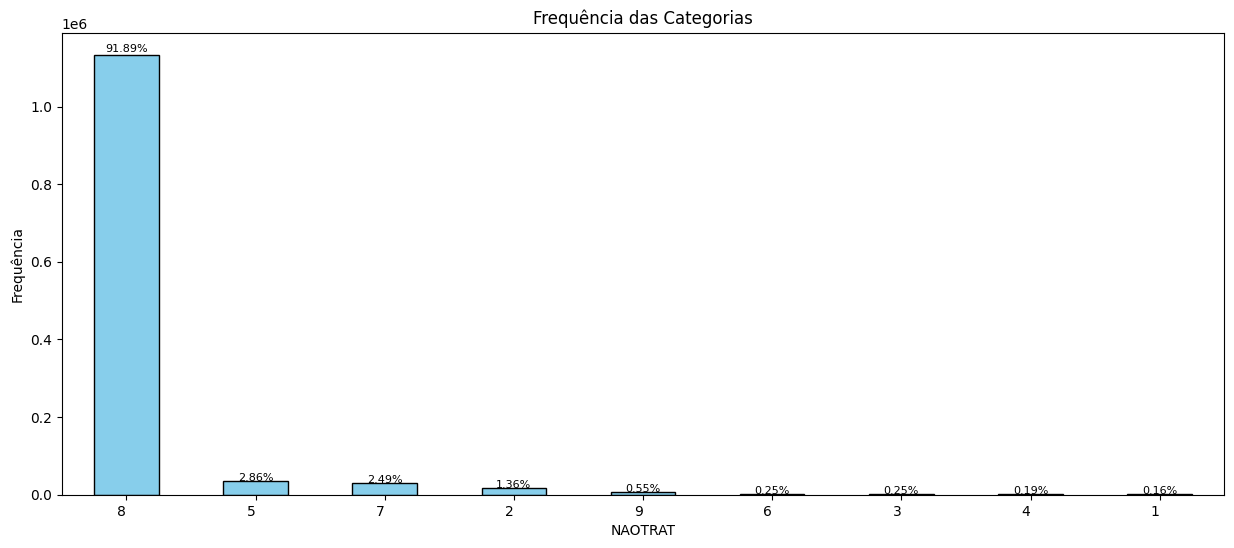

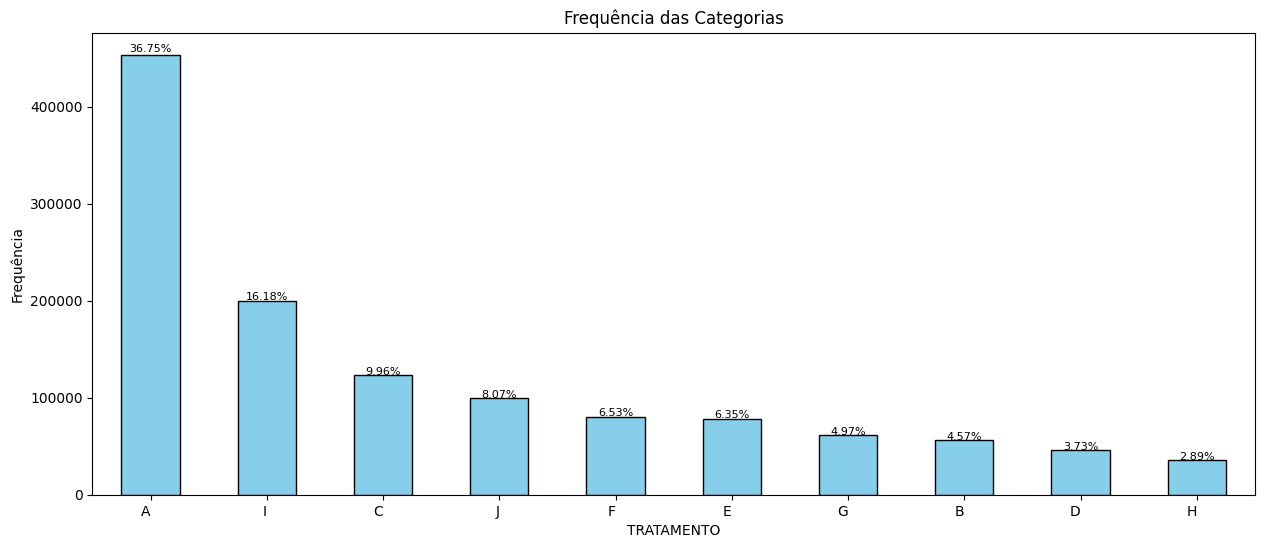

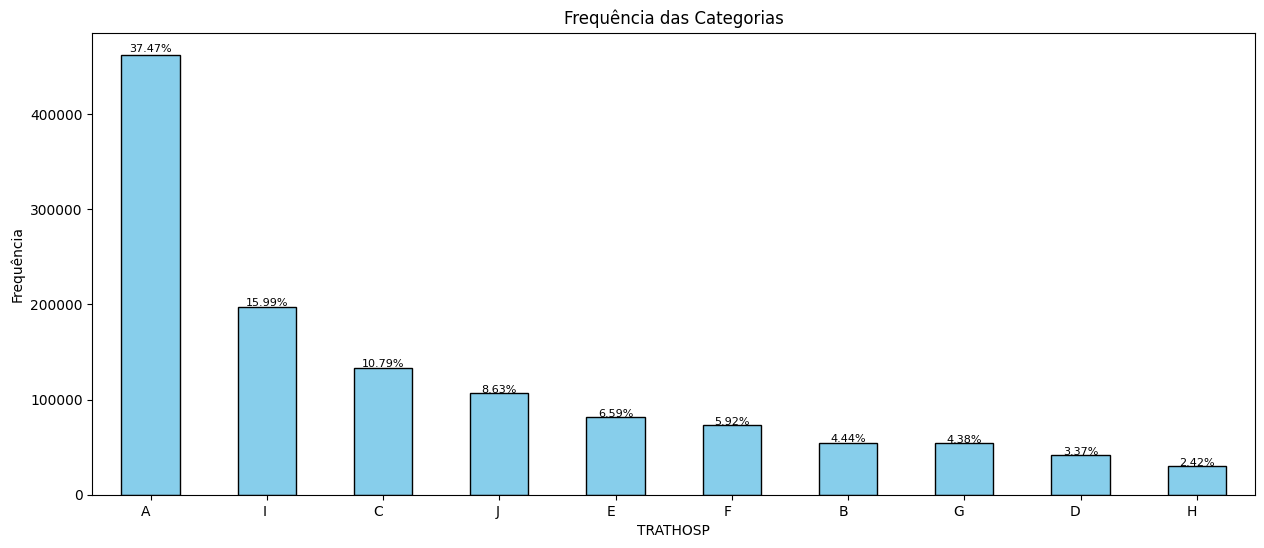

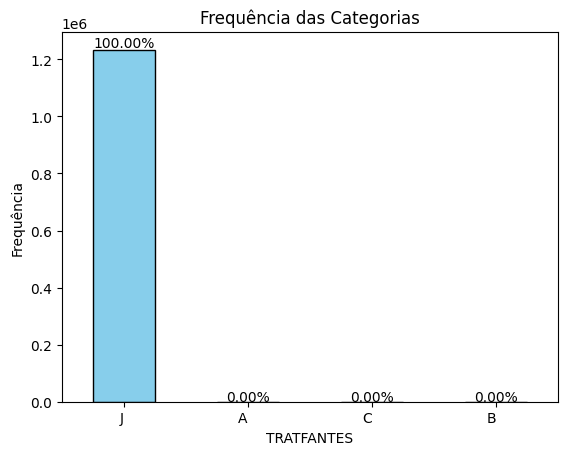

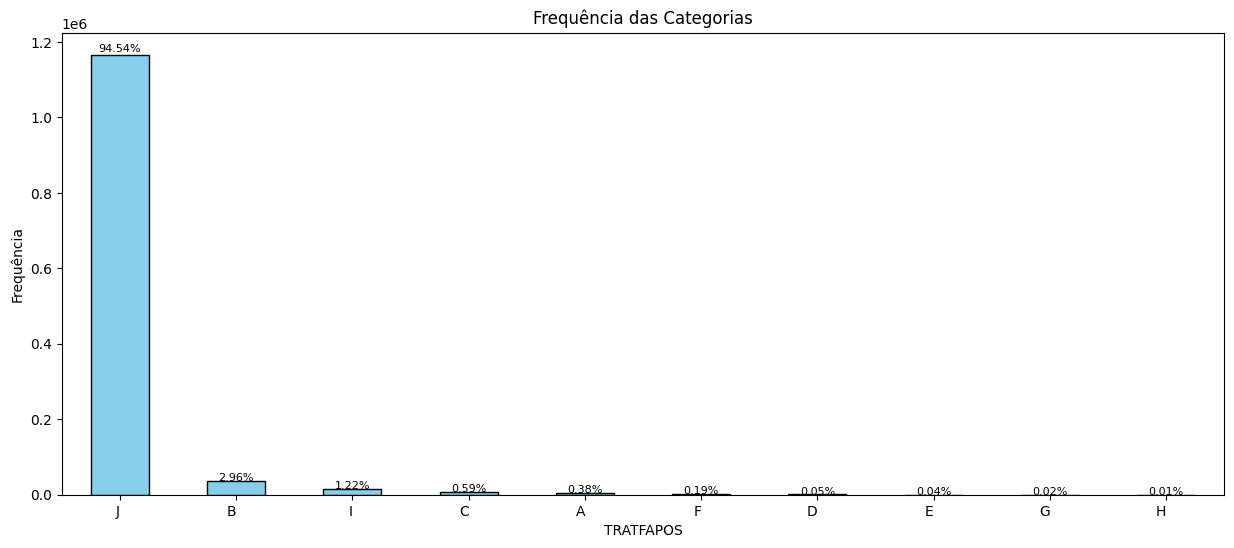

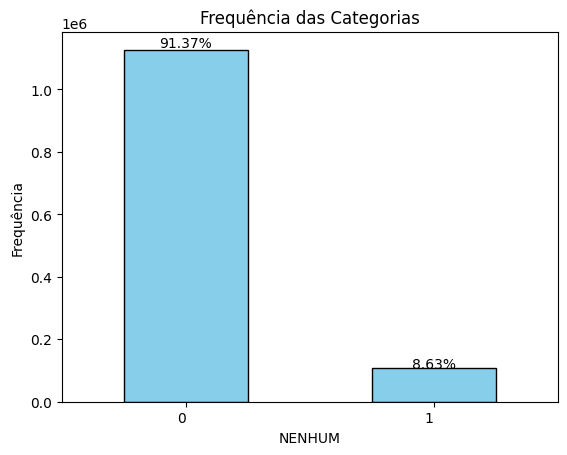

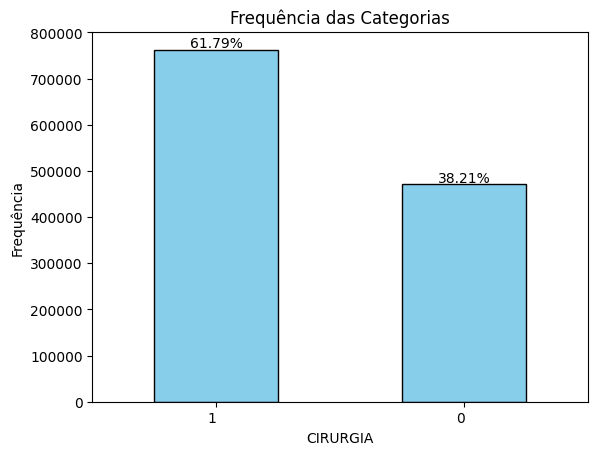

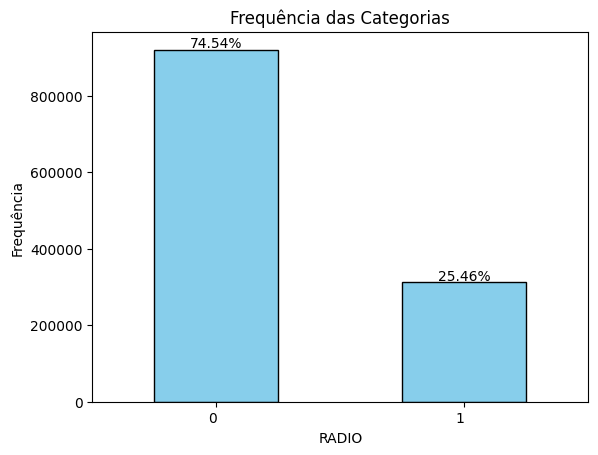

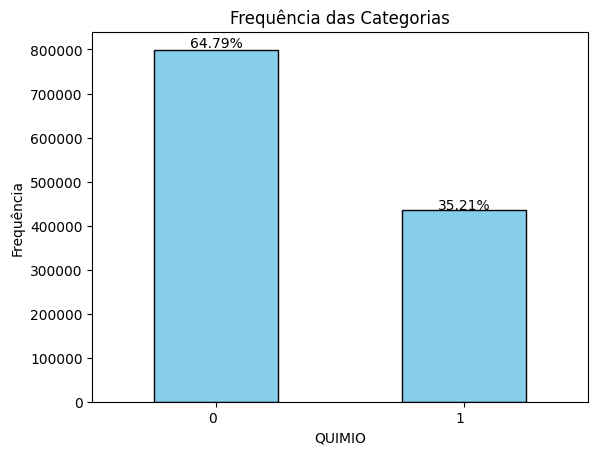

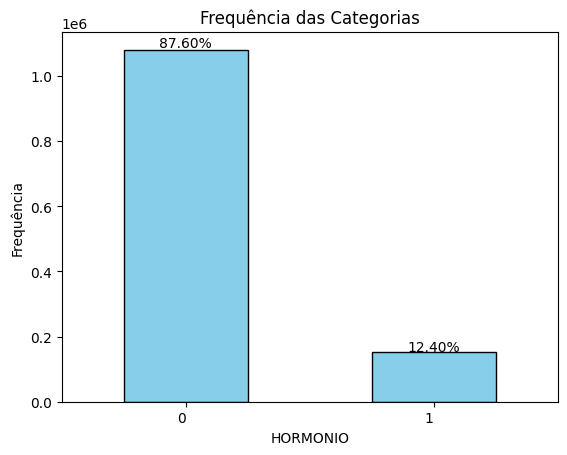

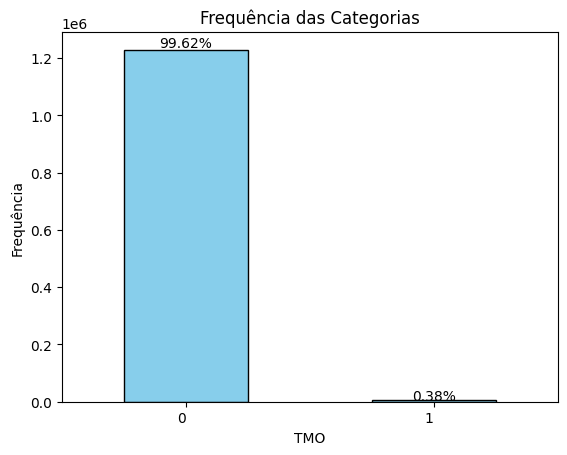

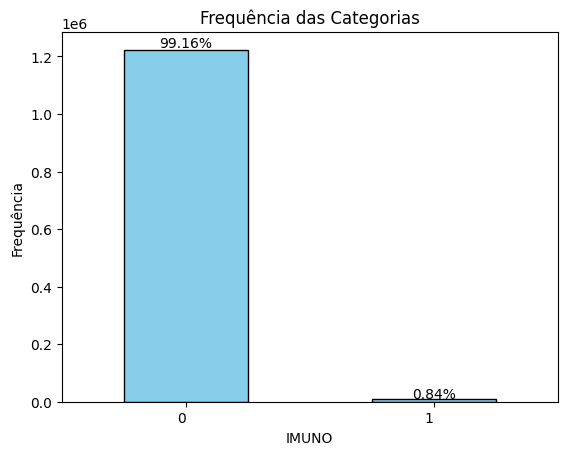

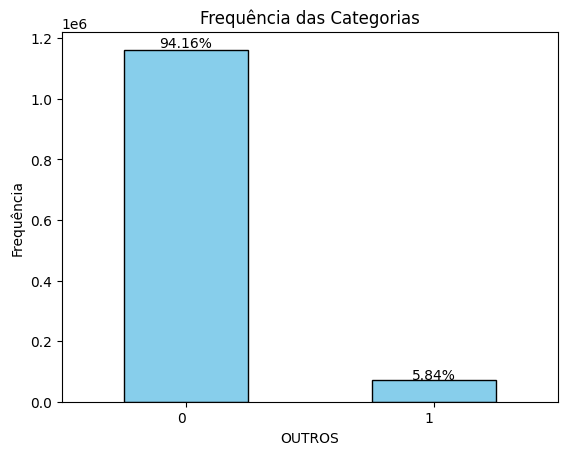

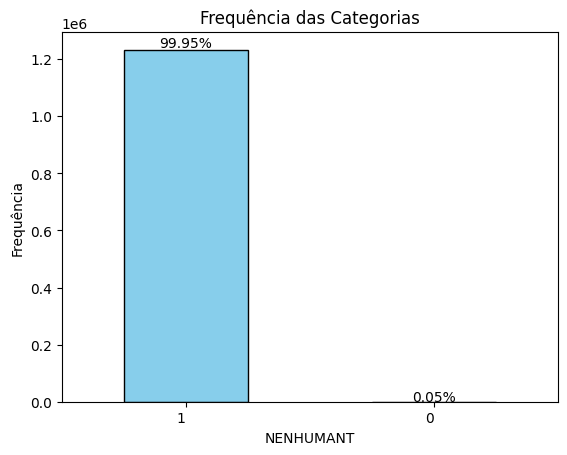

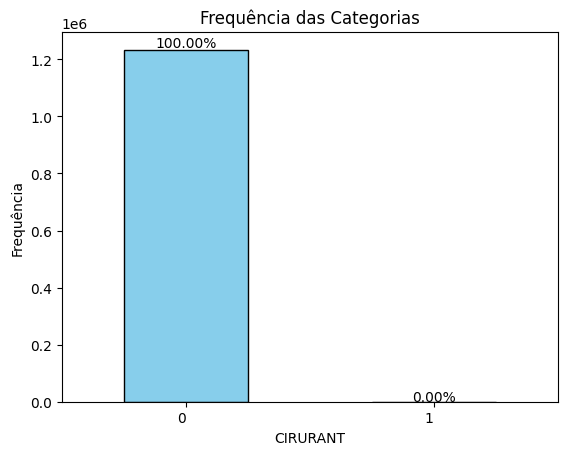

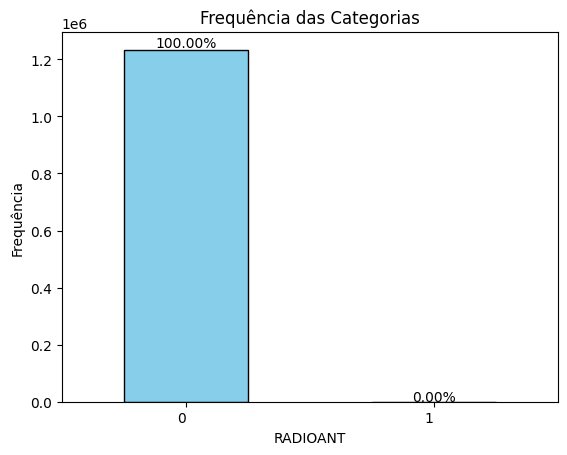

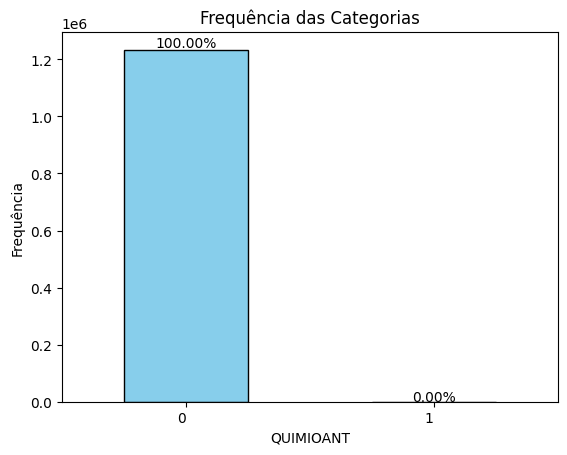

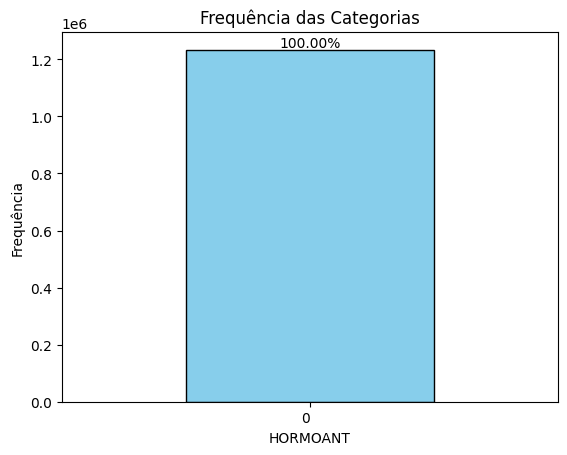

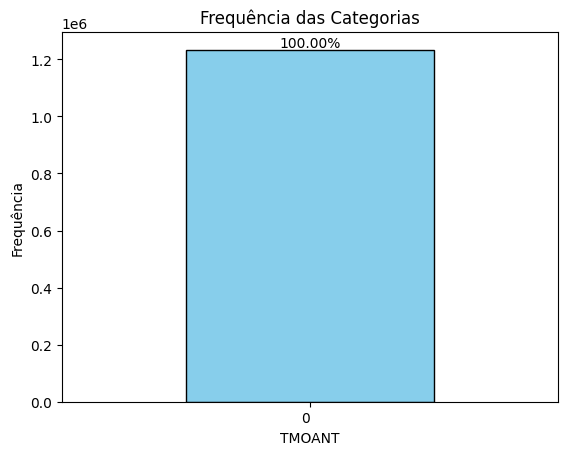

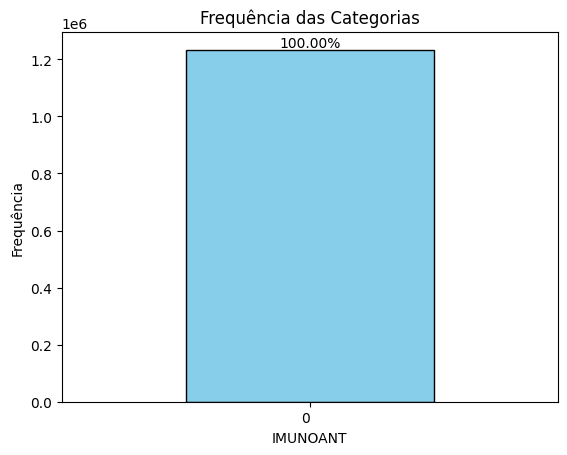

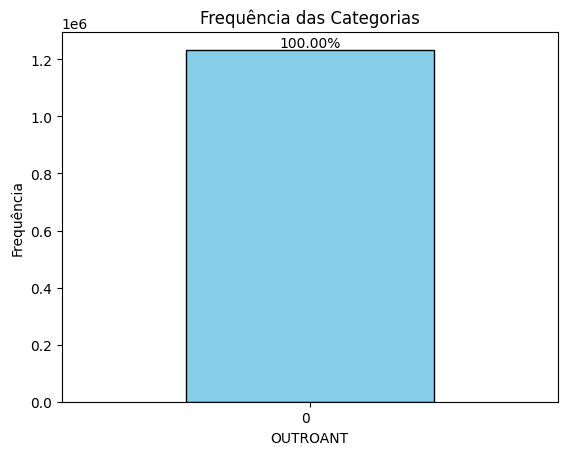

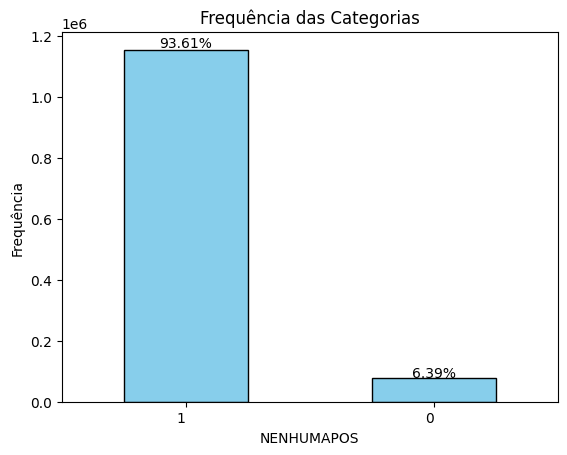

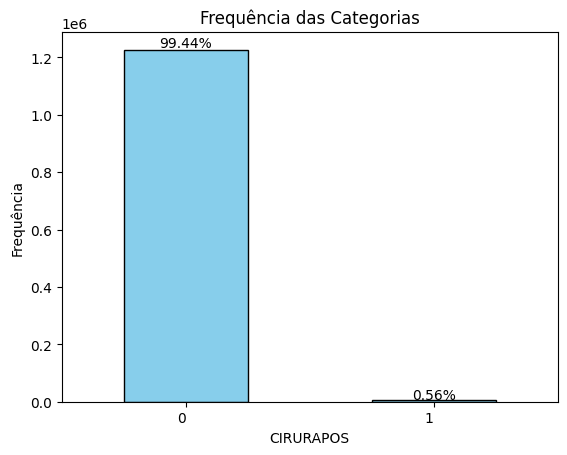

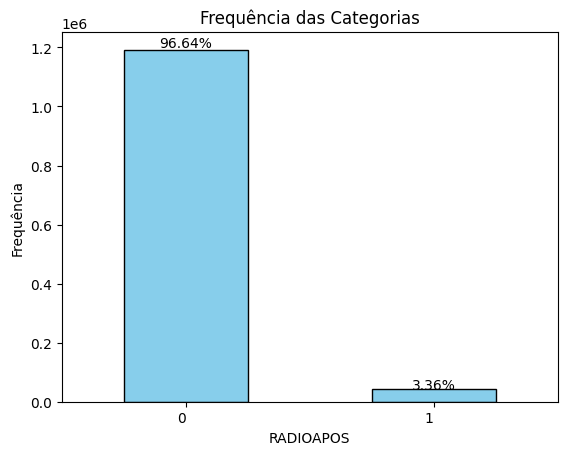

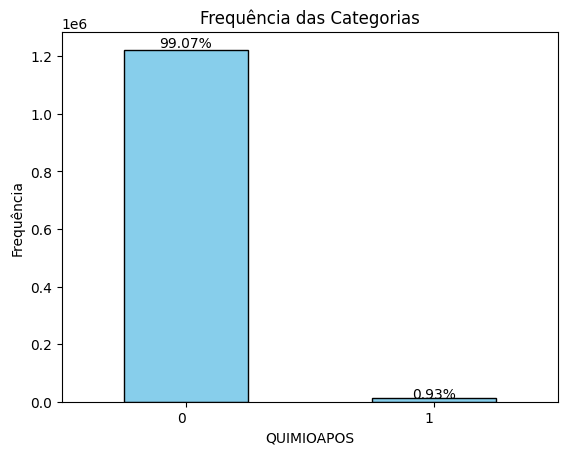

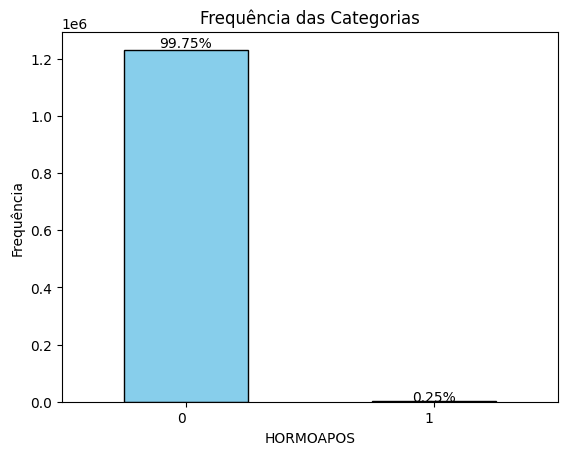

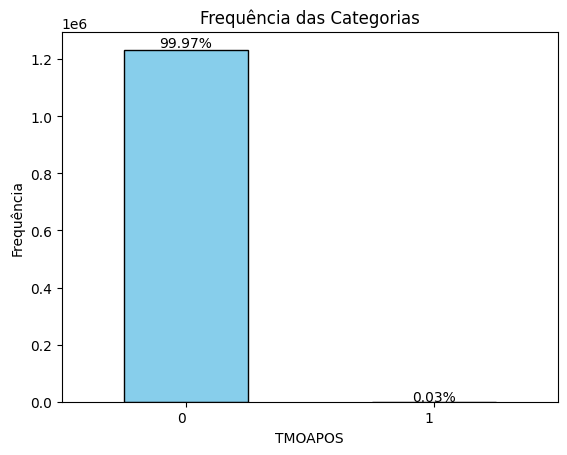

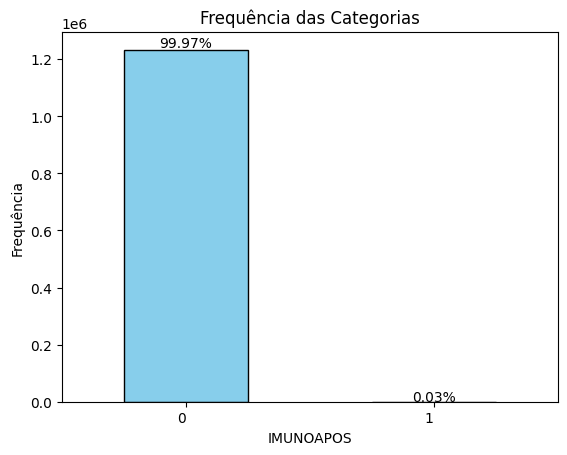

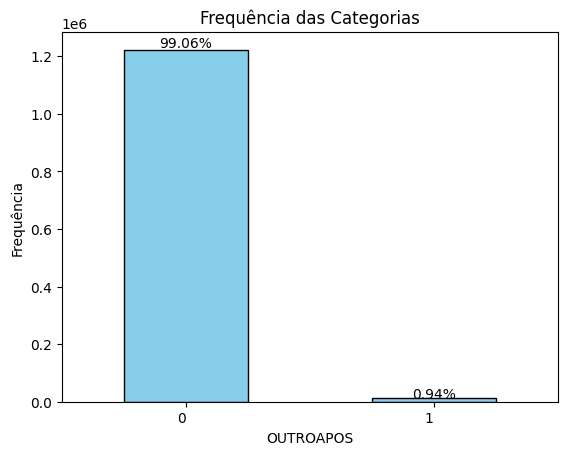

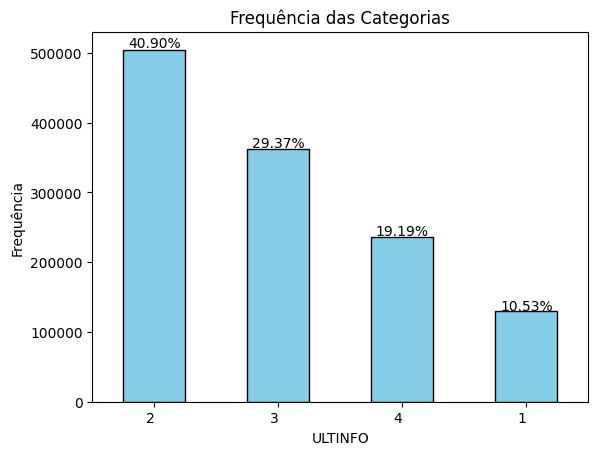

<Figure size 1500x600 with 0 Axes>

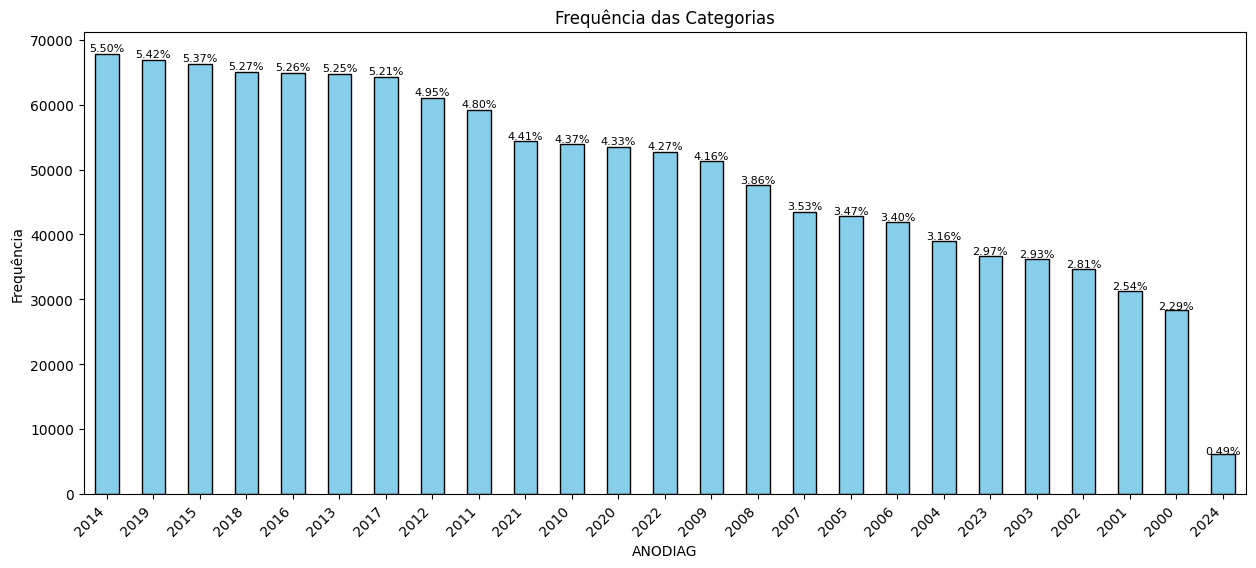

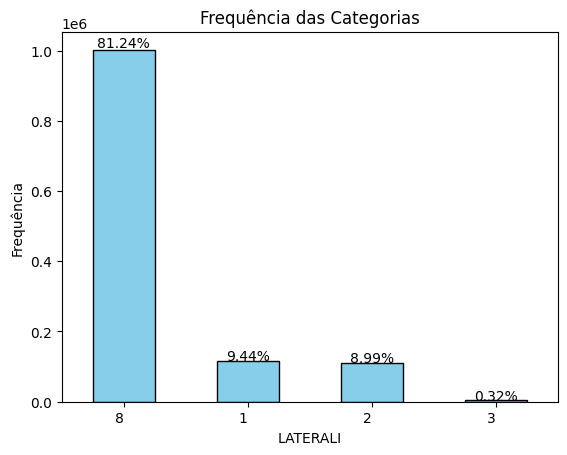

<Figure size 1500x600 with 0 Axes>

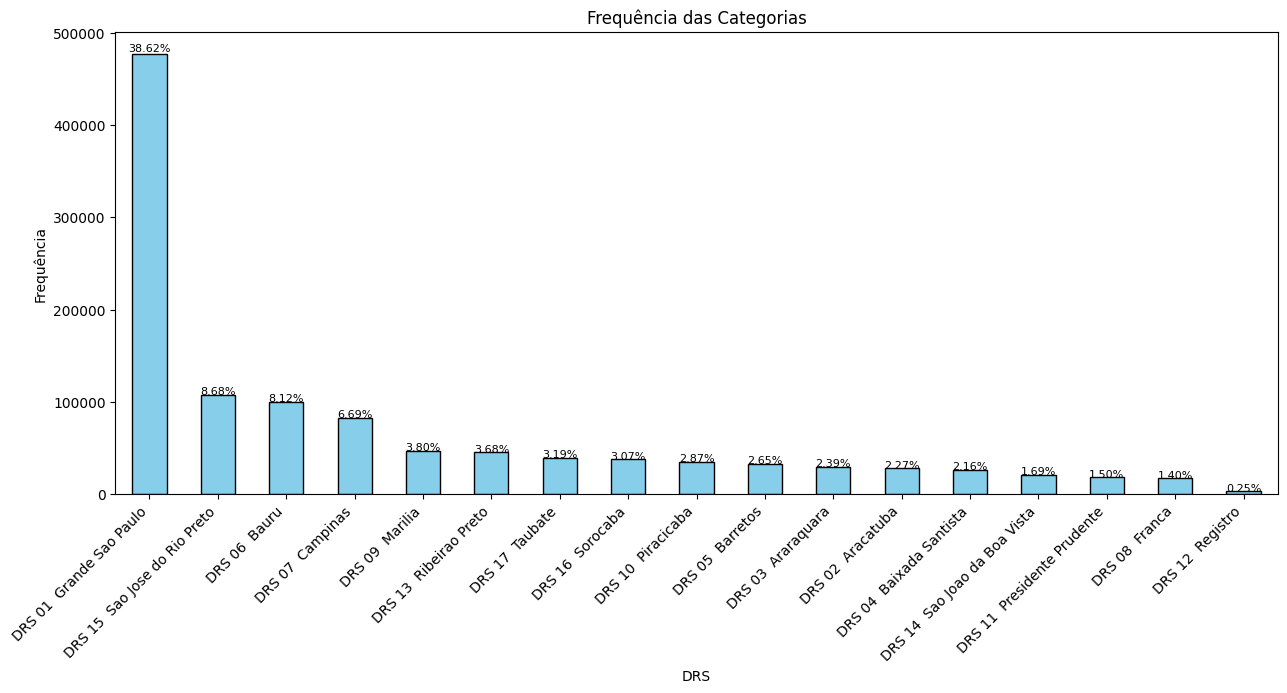

<Figure size 1500x600 with 0 Axes>

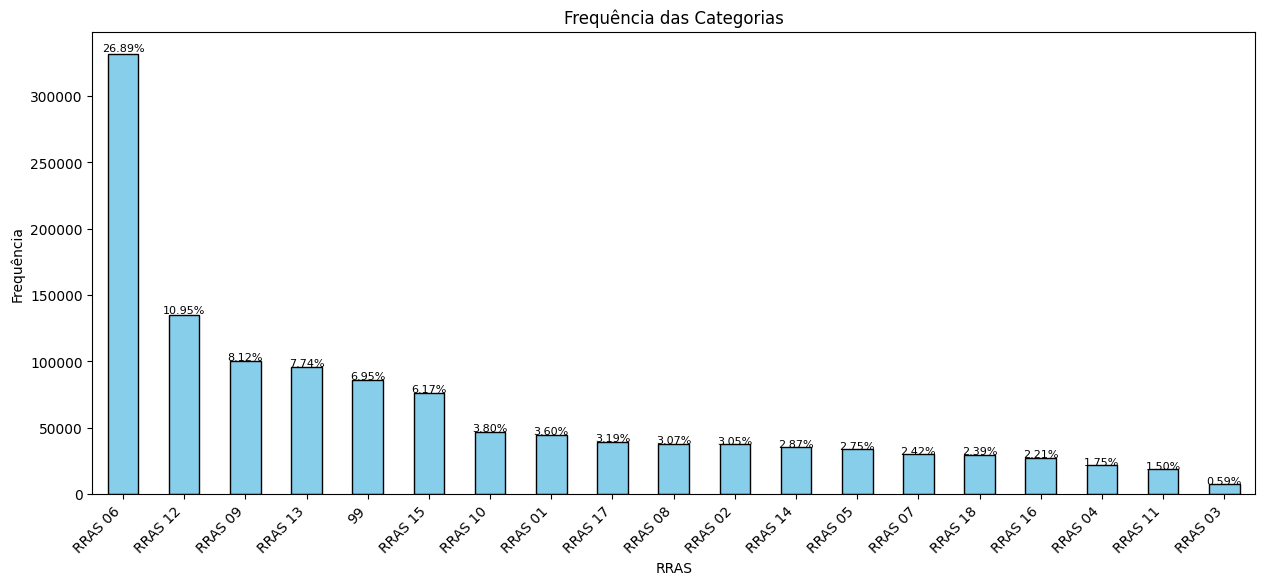

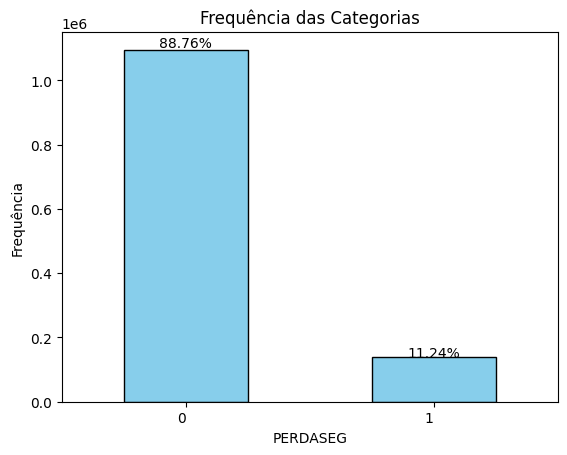

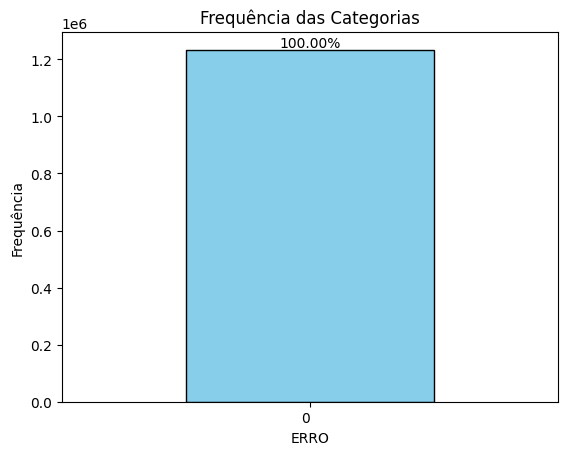

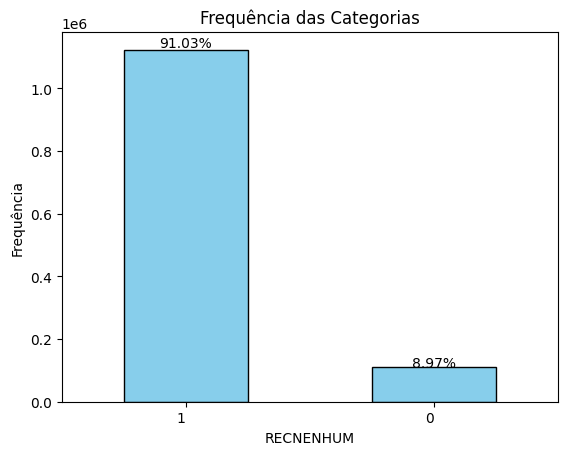

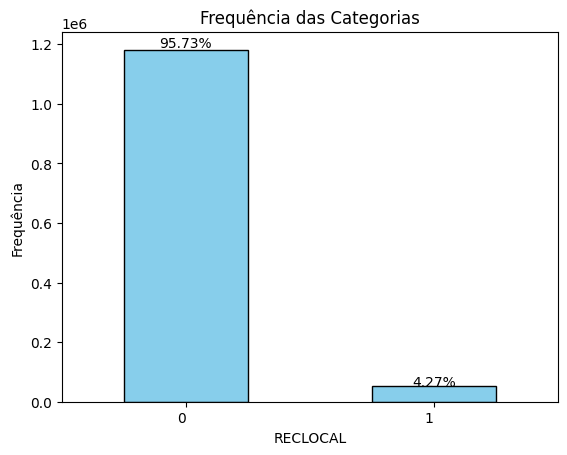

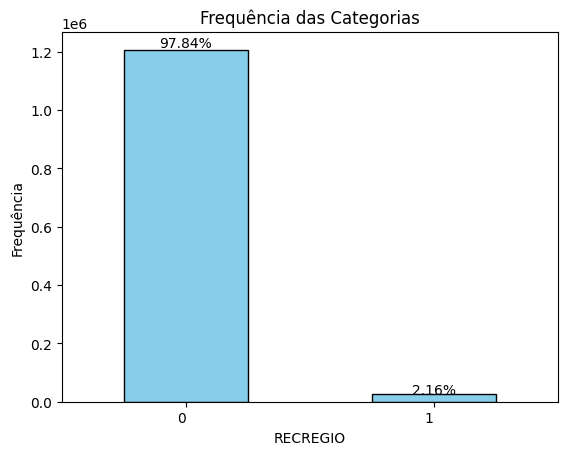

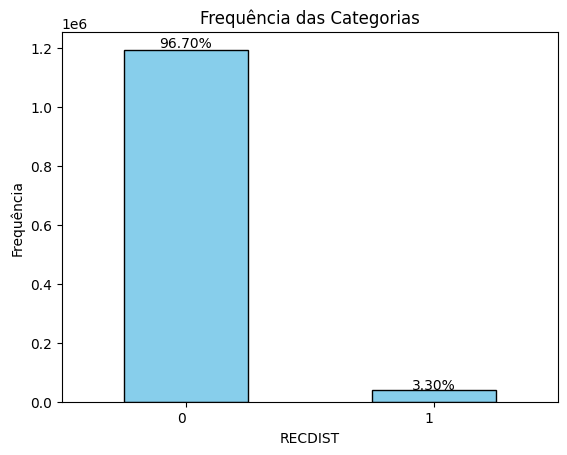

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

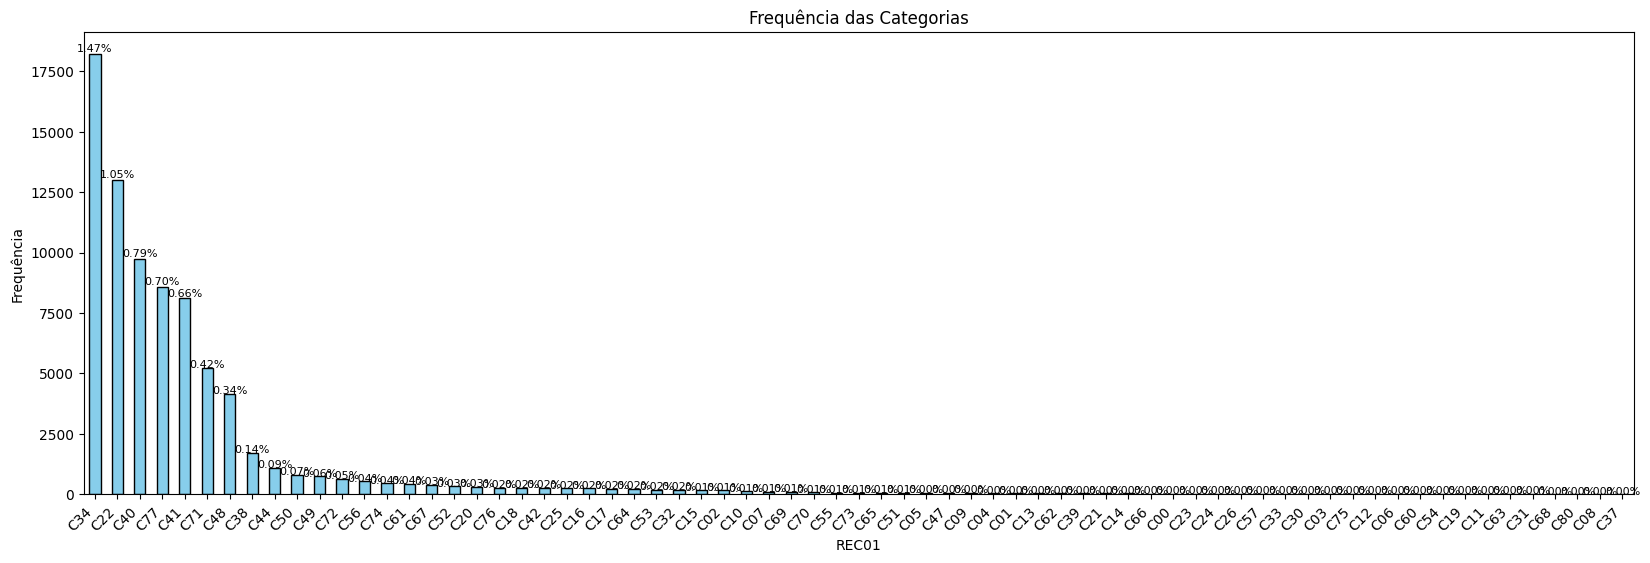

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

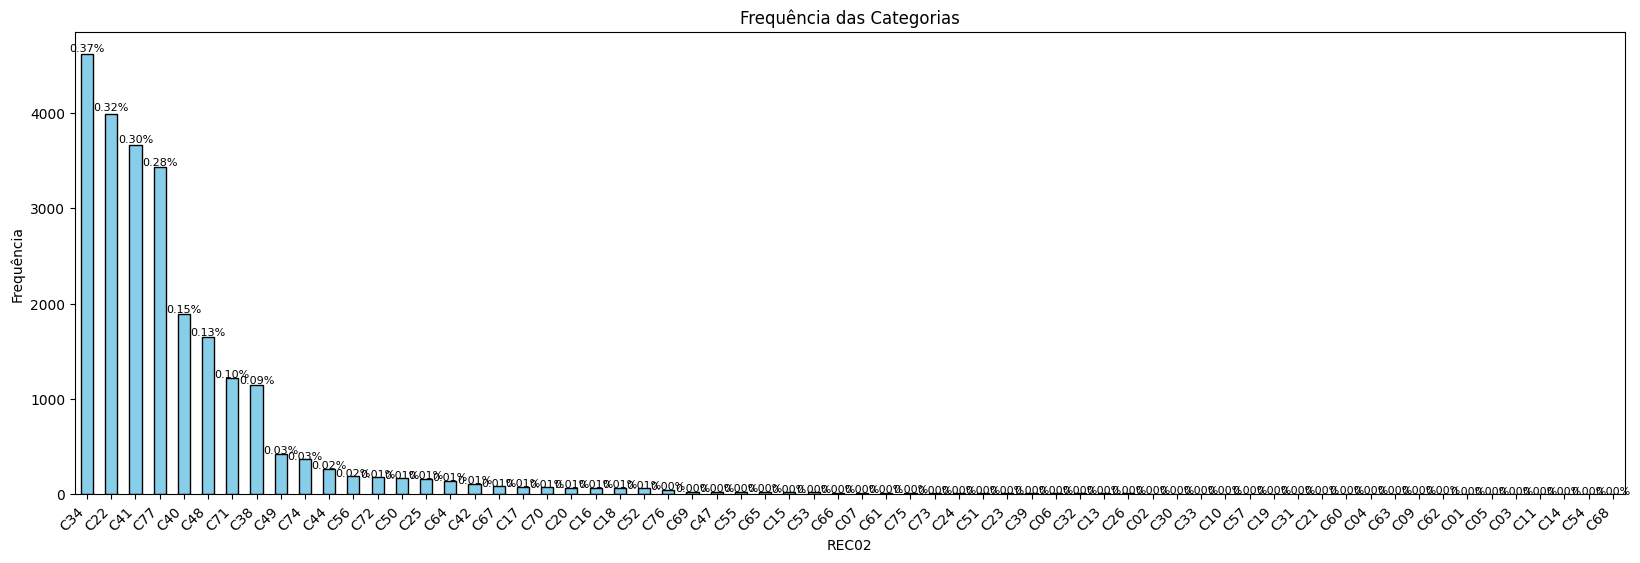

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

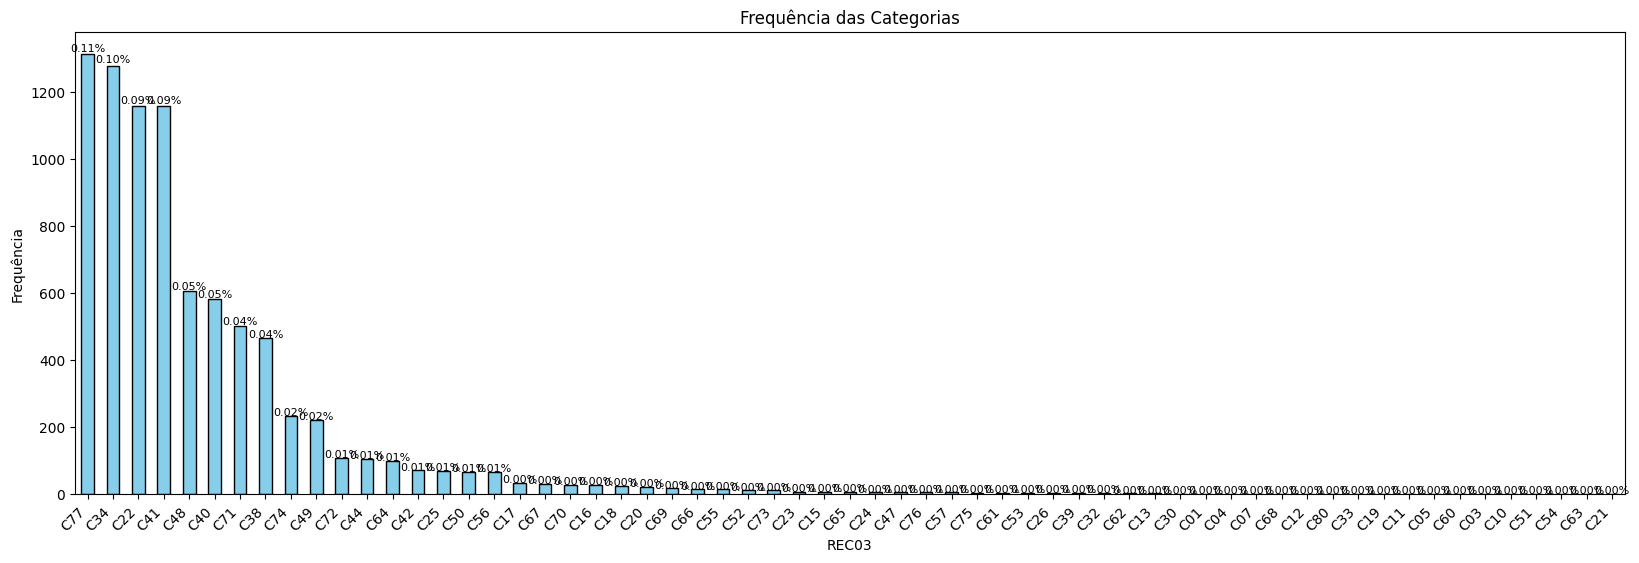

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

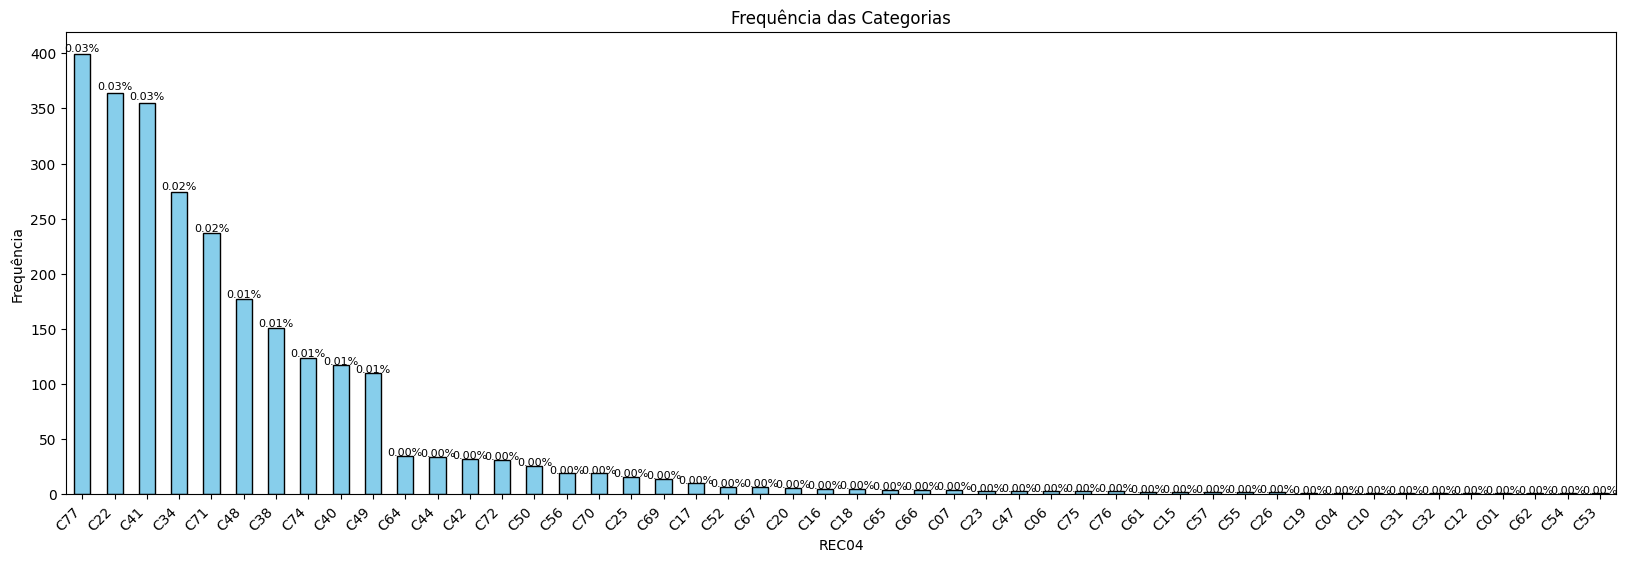

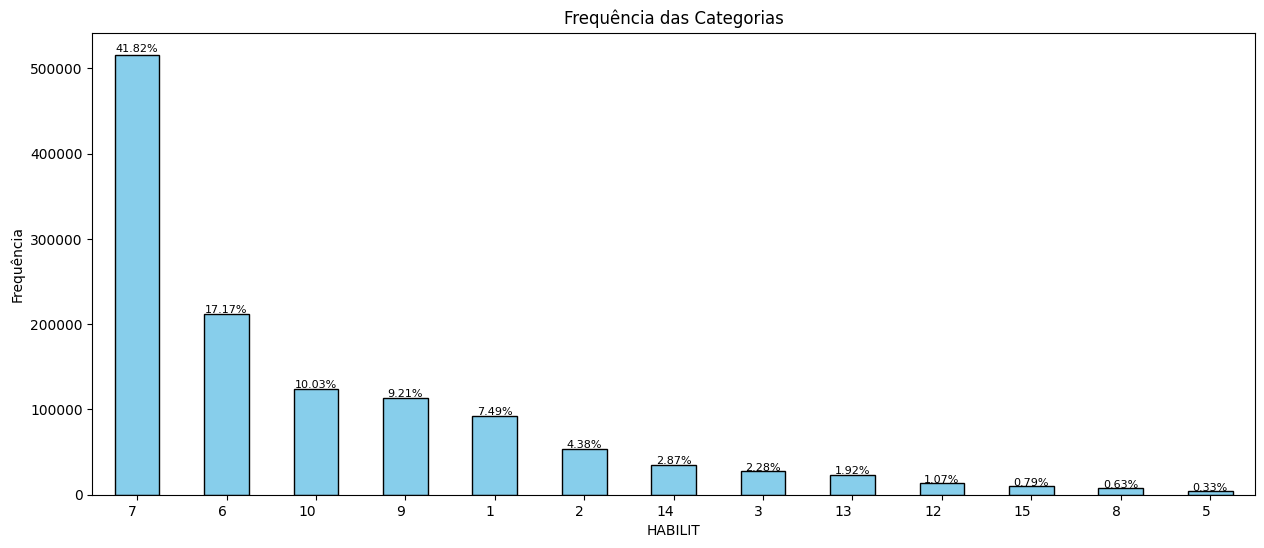

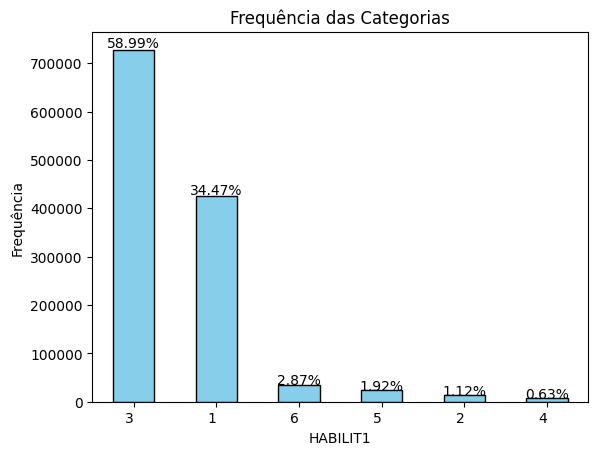

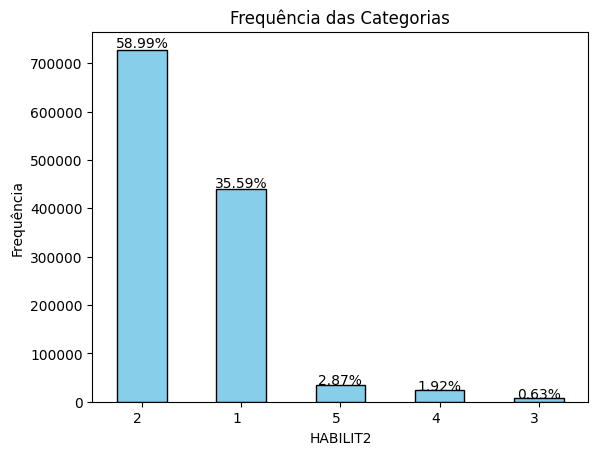

<Figure size 1500x600 with 0 Axes>

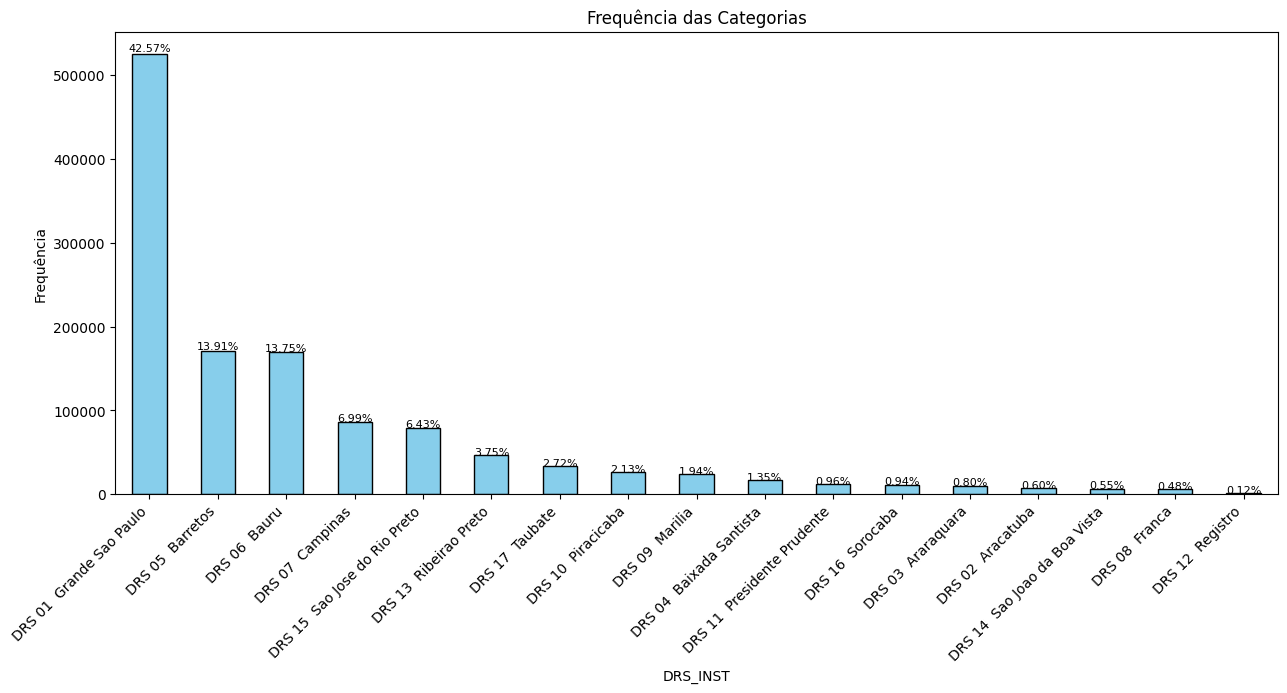

<Figure size 1500x600 with 0 Axes>

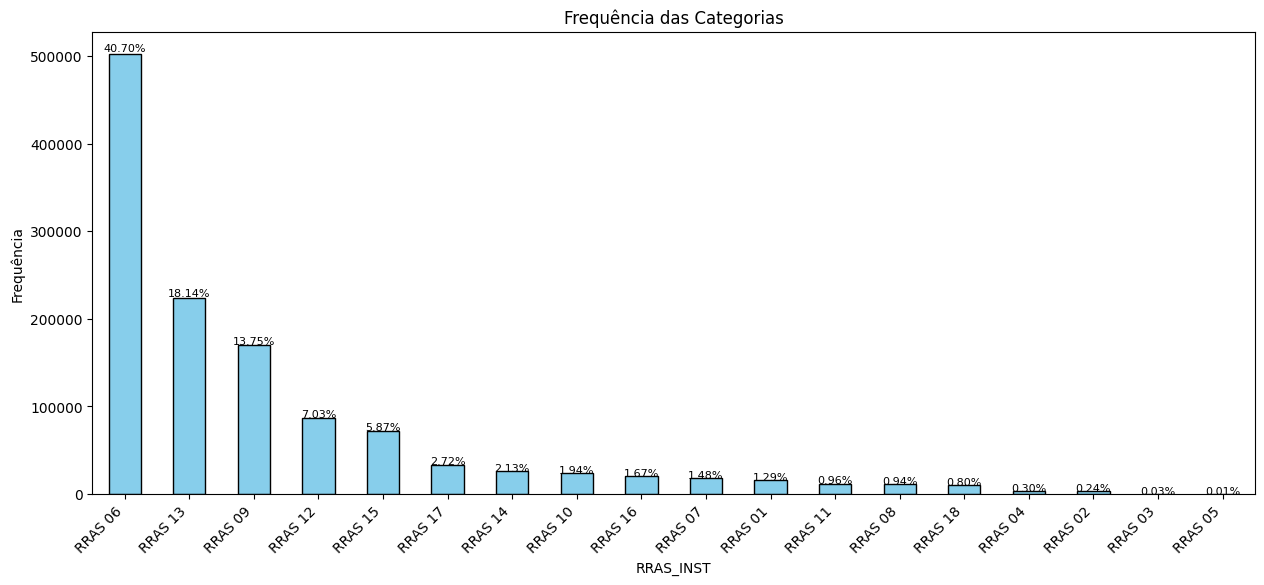

In [52]:
exibe_df(df_geral, 't')

# <font size = 6> **Matriz de correlação**

In [53]:
def exibe_cm(df):
    """
    Prepara o dataset, filtrando e alterando valores não numéricos para a
    exibição das colunas em forma de uma matriz de correlação.

    Parâmetros:
    -----------
    df : pandas.DataFrame
         Dataset a ser preparado.
    col : string
          Define a lista que contém as colunas a não serem analisadas.

    """

    # Limpa o dataframe
    print(df.columns)

    #Cria a matriz de correlação pelo método de pearson
    corr_mat = df.corr(method= 'pearson')

    #Exibe a matriz
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_mat, annot=False, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title("Matriz de Correlação")
    plt.show()

# <font size = 6> **Variáveis Proximais**

## <font size=5, color="orange"> **Função que exibe IBGE**

In [54]:
def exibe_ibge(df):
    ls = df['IBGE']
    num_unicos = ls.nunique()
    print("-------------------------------------")
    print(f"Total de códigos diferentes: {num_unicos}")

    print("\nCódigos mais frequentes:")
    print((ls.value_counts(normalize=True).head(5) * 100).round(2).astype(str) + ' %')
    print("-------------------------------------")

    ls = df['IBGEATEN']
    num_unicos = ls.nunique()
    print(f"Total de códigos diferentes: {num_unicos}")

    print("\nCódigos mais frequentes:")
    print((ls.value_counts(normalize=True).head(5) * 100).round(2).astype(str) + ' %')
    print("-------------------------------------")

## <font size=5, color=orange> **Filtros e categorizações**

<ipython-input-55-68545db7f902>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prox['ECGRUP_CAT'] = ['0' if ec in ['I', 'II'] else '1' for ec in df_prox.ECGRUP]
<ipython-input-55-68545db7f902>:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_prox['TOPOGRUP'] = df_prox['TOPOGRUP'].replace({
<ipython-input-55-68545db7f902>:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

-------------------------------------
Total de códigos diferentes: 645

Códigos mais frequentes:
IBGE
3550308    27.55 %
3549805     2.11 %
3509502     1.79 %
3543402     1.53 %
3518800     1.46 %
Name: proportion, dtype: object
-------------------------------------
Total de códigos diferentes: 48

Códigos mais frequentes:
IBGEATEN
3550308    40.05 %
3505500    11.23 %
3525300    10.51 %
3549805     6.61 %
3509502     4.65 %
Name: proportion, dtype: object
-------------------------------------
Não há dados faltantes



<ipython-input-55-68545db7f902>:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_prox['RRAS_INST'] = df_prox['RRAS_INST'].replace({


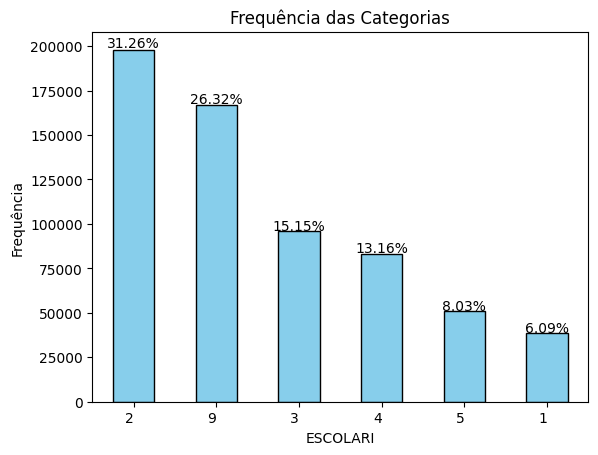

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

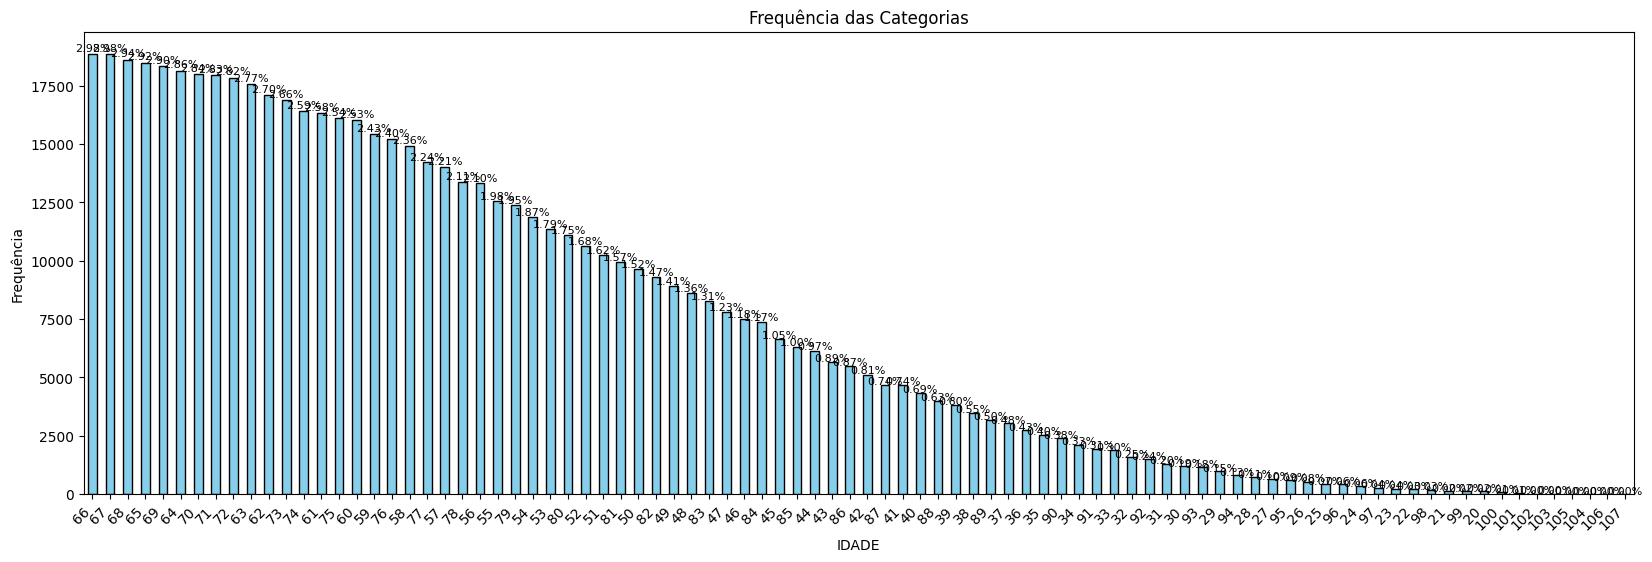

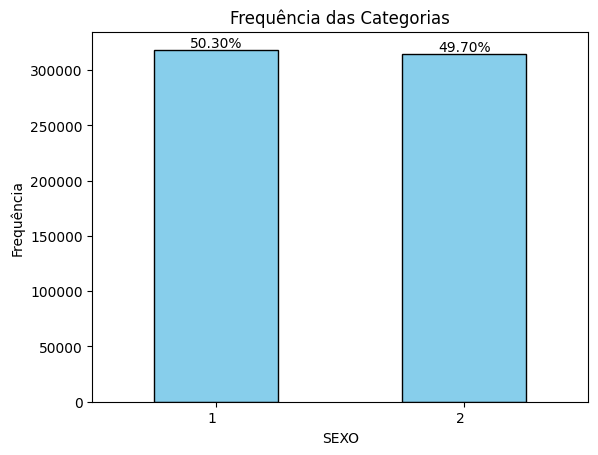

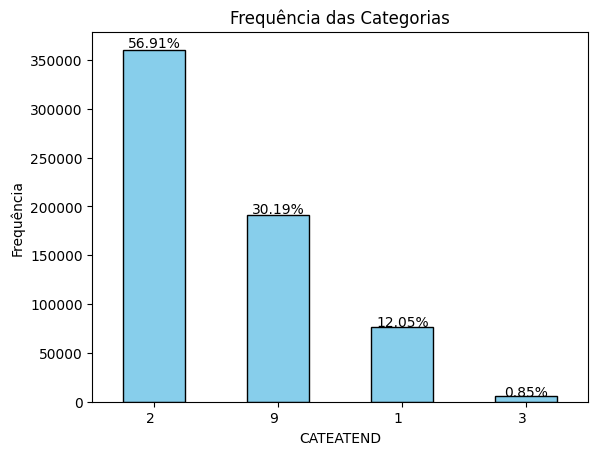

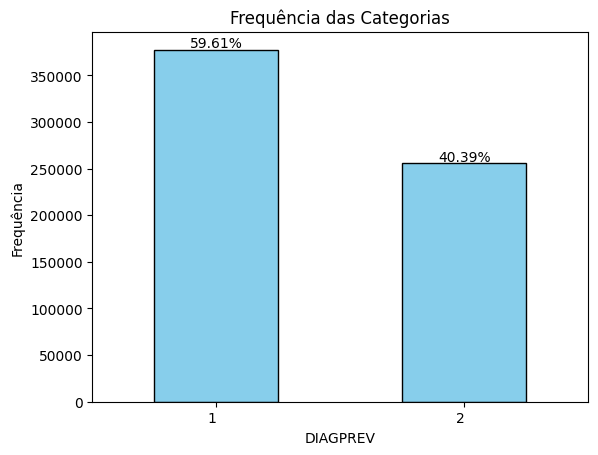

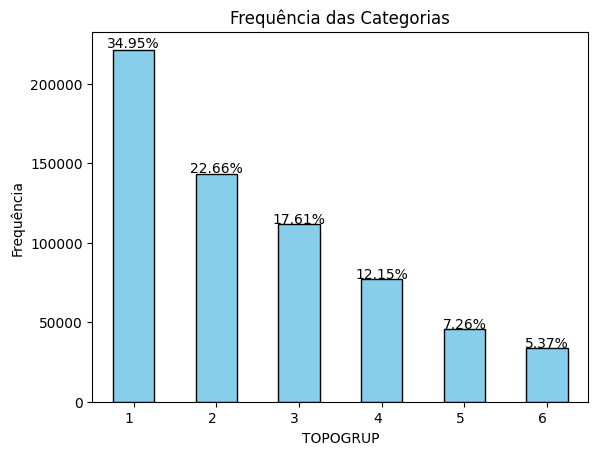

<Figure size 1500x600 with 0 Axes>

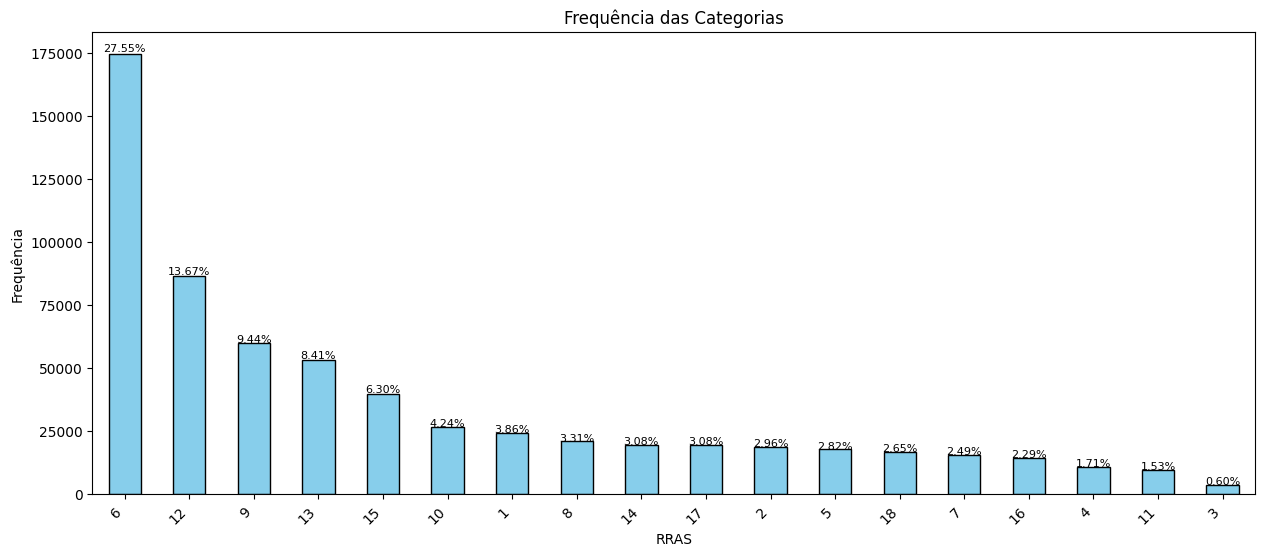

<Figure size 1500x600 with 0 Axes>

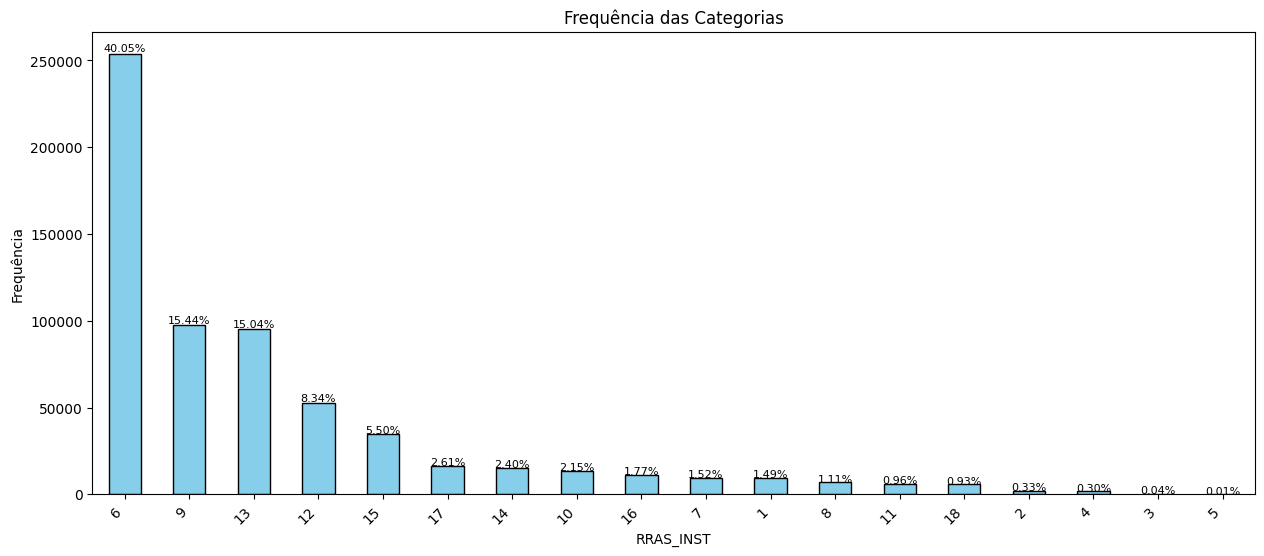

<Figure size 1500x600 with 0 Axes>

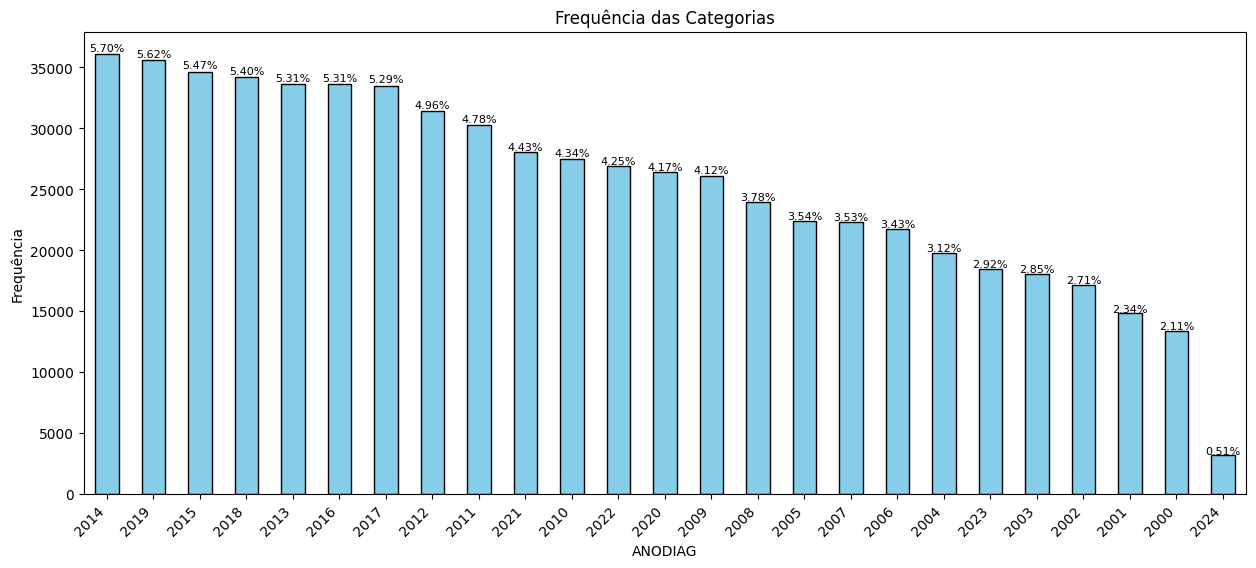

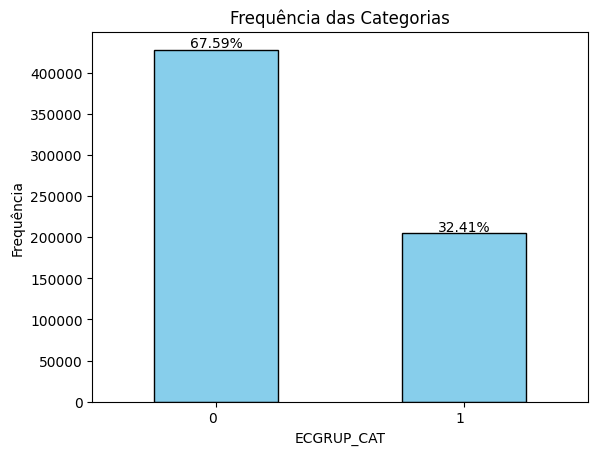

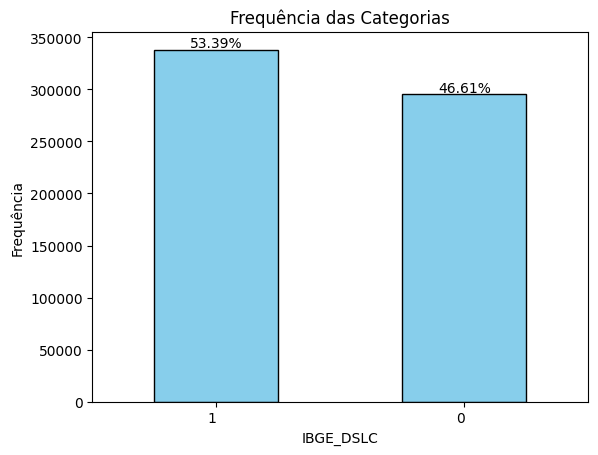



(633220, 13) = 51.32% das linhas


In [55]:
ls_prox = ['ESCOLARI','IDADE','SEXO','IBGE','IBGEATEN','CATEATEND','DIAGPREV','BASEDIAG','ECGRUP','TOPOGRUP','RRAS','RRAS_INST','ANODIAG']

# Cria um dataframe apenas com as colunas presentes em ls_prox a partir do dataframe geral
df_prox = df_geral[ls_prox]

# Filtra para dados após 2013
#df_prox = df_prox[df_prox.ANODIAG > 2013]

# Filtra para os pacientes com mais de 19 anos
df_prox = df_prox[df_prox.IDADE > 19]

# Seleciona apenas os pacientes com confirmação microsocópica
df_prox = df_prox[df_prox.BASEDIAG == 3]
df_prox = df_prox.drop(columns=['BASEDIAG'])

# Seleciona apenas os pacientes com RRAS
df_prox = df_prox[df_prox['RRAS'] != "99"]

# Remove os pacientes que se enquadram no grupo de estagiamento clínico 0, X e Y
df_prox = df_prox[~df_prox.ECGRUP.isin(['0','X','Y'])]

# Categorização da coluna ECGRUP em 'Inicial (0)' e 'Avançado (1)'
df_prox['ECGRUP_CAT'] = ['0' if ec in ['I', 'II'] else '1' for ec in df_prox.ECGRUP]
df_prox = df_prox.drop(columns=['ECGRUP'])

# Reune as topologias C18, C19, C20 em C20 (Cólo retal)
df_prox['TOPOGRUP'] = df_prox['TOPOGRUP'].replace({
    'C19' : 'C20',
    'C18' : 'C20'
})

# Cria uma lista com as 6 topologias mais frequentes
topo_ls = df_prox['TOPOGRUP'].value_counts().head(6).index.tolist()
df_prox = df_prox[df_prox.TOPOGRUP.isin(topo_ls)]

# Catogoriza as 6 principais topologias
df_prox['TOPOGRUP'] = df_prox['TOPOGRUP'].replace({
    'C44' : 1,
    'C50' : 2,
    'C61' : 3,
    'C20' : 4,
    'C34' : 5,
    'C16' : 6
})

# Deixa as categorias numéricas
df_prox['RRAS'] = df_prox['RRAS'].replace({
    'RRAS 01' : 1,
    'RRAS 02' : 2,
    'RRAS 03' : 3,
    'RRAS 04' : 4,
    'RRAS 05' : 5,
    'RRAS 06' : 6,
    'RRAS 07' : 7,
    'RRAS 08' : 8,
    'RRAS 09' : 9,
    'RRAS 10' : 10,
    'RRAS 11' : 11,
    'RRAS 12' : 12,
    'RRAS 13' : 13,
    'RRAS 14' : 14,
    'RRAS 15' : 15,
    'RRAS 16' : 16,
    'RRAS 17' : 17,
    'RRAS 18' : 18
})

# Deixa as categorias numéricas
df_prox['RRAS_INST'] = df_prox['RRAS_INST'].replace({
    'RRAS 01' : 1,
    'RRAS 02' : 2,
    'RRAS 03' : 3,
    'RRAS 04' : 4,
    'RRAS 05' : 5,
    'RRAS 06' : 6,
    'RRAS 07' : 7,
    'RRAS 08' : 8,
    'RRAS 09' : 9,
    'RRAS 10' : 10,
    'RRAS 11' : 11,
    'RRAS 12' : 12,
    'RRAS 13' : 13,
    'RRAS 14' : 14,
    'RRAS 15' : 15,
    'RRAS 16' : 16,
    'RRAS 17' : 17,
    'RRAS 18' : 18
})

# Adaptação para analisar a coluna IBGE
exibe_ibge(df_prox)

# Verificação se houve deslocamento entre municípios (1 = houve \ 0 = não houve)
df_prox['IBGE_DSLC'] = (df_prox['IBGE'] != df_prox['IBGEATEN']).astype(int)

exibe_df(df_prox, 't')

# Exibe quanto do banco orginal ainda resta
print(f'{df_prox.shape} = {(100*df_prox.shape[0]/1233793):.2f}% das linhas')

## <font size=5, color=orange> **Matriz de correlação**

Index(['ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'IBGEATEN', 'CATEATEND',
       'DIAGPREV', 'TOPOGRUP', 'RRAS', 'RRAS_INST', 'ANODIAG', 'ECGRUP_CAT',
       'IBGE_DSLC'],
      dtype='object')


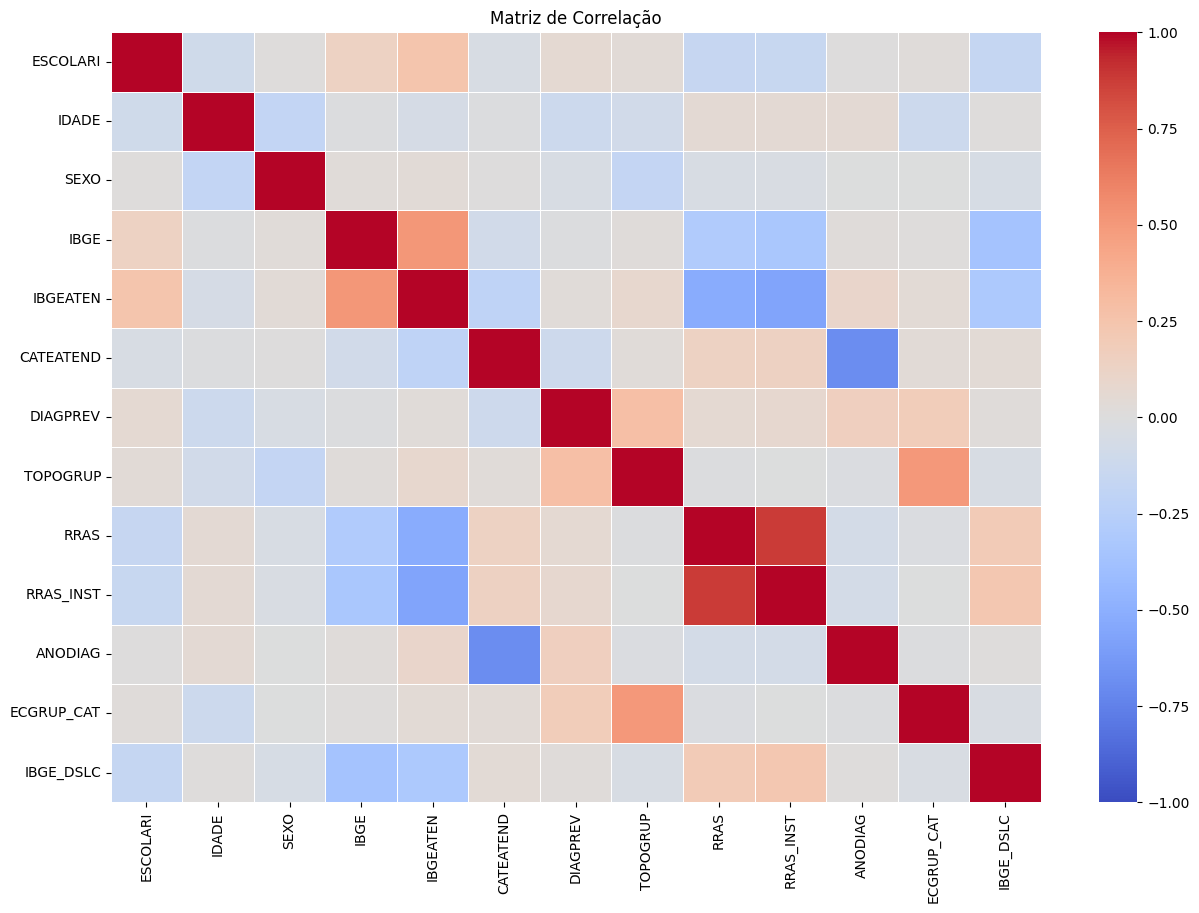

In [56]:
exibe_cm(df_prox)

# <font size = 6> **Missings ao longo dos anos**

## <font size=5, color="orange"> **CATEATEND**

In [57]:
# Filtra apenas os dados em que CATEATEND é "9"
df_9 = df_prox[df_prox['CATEATEND'] == 9]

# Conta quantas vezes o CATEATEND "9" aparece por ANODIAG
frequencia_9 = df_9.groupby('ANODIAG').size()

# Conta o total de ocorrências por ANODIAG (independente do CATEATEND)
total_por_ano = df_prox.groupby('ANODIAG').size()

# Calcula a porcentagem do CATEATEND "9" em relação ao total de cada ano
percentual_9 = (frequencia_9 / total_por_ano * 100).round(2)

# Exibe o resultado
print(percentual_9)

ANODIAG
2000    80.24
2001    81.71
2002    80.46
2003    80.14
2004    79.55
2005    77.84
2006    74.95
2007    72.35
2008    70.81
2009    66.31
2010    62.78
2011    50.84
2012    22.92
2013     0.95
2014      NaN
2015      NaN
2016      NaN
2017      NaN
2018      NaN
2019      NaN
2020      NaN
2021      NaN
2022      NaN
2023      NaN
2024      NaN
dtype: float64


## <font size=5, color="orange"> **ESCOLARI**

In [58]:
# Filtra apenas os dados em que ESCOLARI é "9"
df_9 = df_prox[df_prox['ESCOLARI'] == 9]

# Conta quantas vezes o ESCOLARI "9" aparece por ANODIAG
frequencia_9 = df_9.groupby('ANODIAG').size()

# Conta o total de ocorrências por ANODIAG (independente do ESCOLARI)
total_por_ano = df_prox.groupby('ANODIAG').size()

# Calcula a porcentagem do ESCOLARI "9" em relação ao total de cada ano
percentual_9 = (frequencia_9 / total_por_ano * 100).round(2)

# Exibe o resultado
print(percentual_9)

ANODIAG
2000    31.58
2001    28.46
2002    28.48
2003    27.93
2004    27.43
2005    28.24
2006    27.63
2007    30.17
2008    30.45
2009    30.39
2010    27.72
2011    28.83
2012    29.04
2013    29.57
2014    27.98
2015    25.56
2016    20.62
2017    20.07
2018    19.54
2019    23.59
2020    23.86
2021    26.28
2022    23.38
2023    24.88
2024    27.61
dtype: float64


# <font size = 6> **Regressões Logísticas - ECGRUP_CAT**

In [59]:
def plot_confusion_matrix(model, x, y, format='.4f'):
    """
    Plota uma matriz de confusão normalizada e um relatório de classificação.

    Parâmetros:
    -----------
    model : estimador
        Um modelo de classificação já treinado.
    x : array-like, shape (n_samples, n_features)
        Conjunto de teste com as features.
    y : array-like, shape (n_samples,)
        Conjunto de teste com o label.
    format : str, opcional (padrão='.4f')
        O formato a ser usado para os valores na matriz de confusão.

    Retorno:
    --------
    None
    """
    # Predição (usado para obter as classes únicas)
    y_pred = model.predict(x)
    classes = np.unique(np.concatenate((y, y_pred)))

    with plt.rc_context({'font.size': 12, 'font.weight': 'bold'}):
        ConfusionMatrixDisplay.from_estimator(
            model, x, y, values_format=format, cmap='Blues', normalize='true'
        )
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        plt.title("Matriz de Confusão Normalizada")
        plt.show()

    # Também exibe o relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y, y_pred))

-------------------------ESCOLARI----------------------------------
Model Score: 67.67%


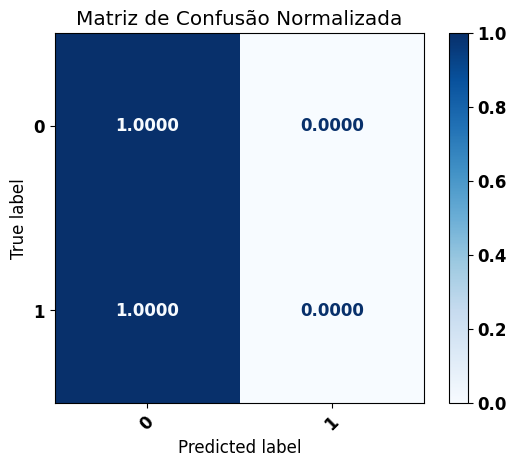


Relatório de Classificação:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     85706
           1       0.00      0.00      0.00     40938

    accuracy                           0.68    126644
   macro avg       0.34      0.50      0.40    126644
weighted avg       0.46      0.68      0.55    126644

-------------------------IDADE----------------------------------
Model Score: 67.66%


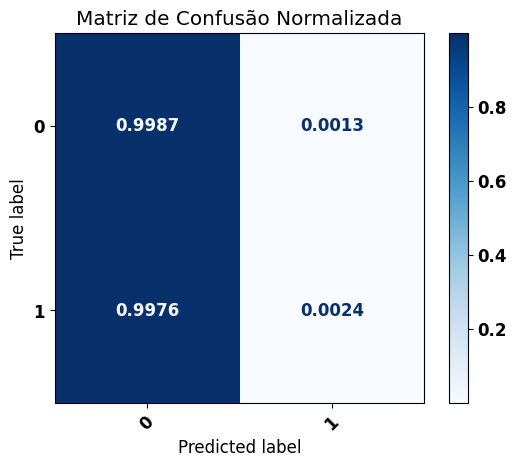


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81     85706
           1       0.46      0.00      0.00     40938

    accuracy                           0.68    126644
   macro avg       0.57      0.50      0.41    126644
weighted avg       0.61      0.68      0.55    126644

-------------------------SEXO----------------------------------
Model Score: 67.67%


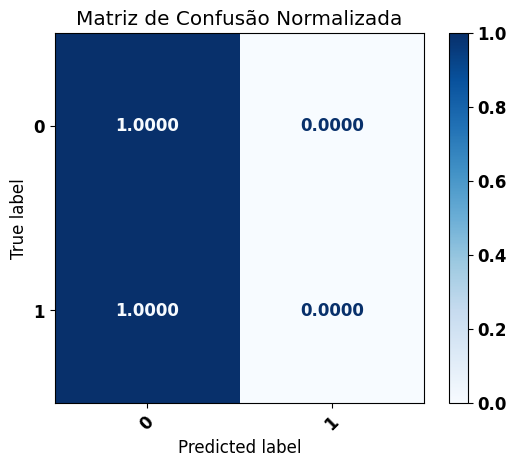


Relatório de Classificação:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     85706
           1       0.00      0.00      0.00     40938

    accuracy                           0.68    126644
   macro avg       0.34      0.50      0.40    126644
weighted avg       0.46      0.68      0.55    126644

-------------------------CATEATEND----------------------------------
Model Score: 67.67%


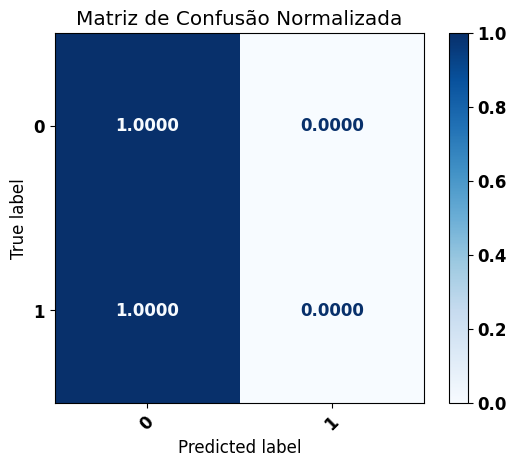


Relatório de Classificação:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     85706
           1       0.00      0.00      0.00     40938

    accuracy                           0.68    126644
   macro avg       0.34      0.50      0.40    126644
weighted avg       0.46      0.68      0.55    126644

-------------------------DIAGPREV----------------------------------
Model Score: 67.67%


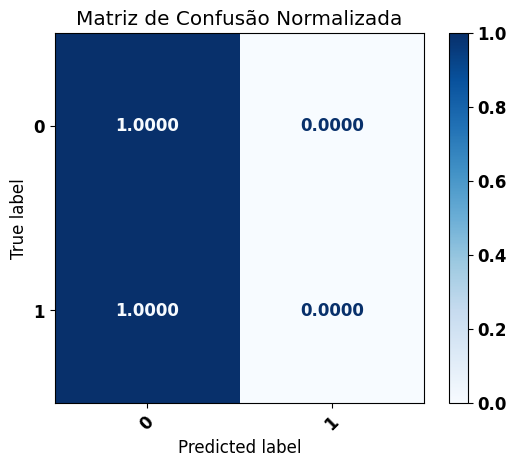


Relatório de Classificação:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     85706
           1       0.00      0.00      0.00     40938

    accuracy                           0.68    126644
   macro avg       0.34      0.50      0.40    126644
weighted avg       0.46      0.68      0.55    126644

-------------------------TOPOGRUP----------------------------------
Model Score: 76.49%


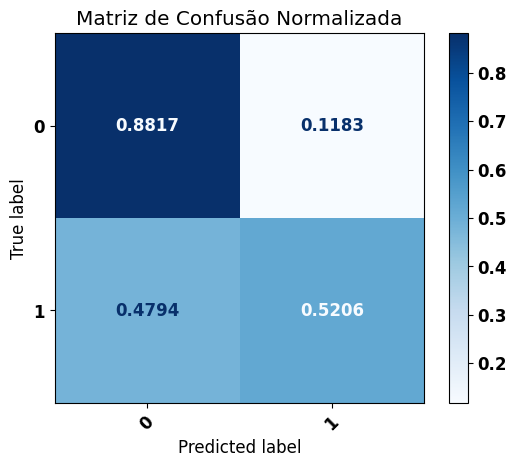


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84     85706
           1       0.68      0.52      0.59     40938

    accuracy                           0.76    126644
   macro avg       0.74      0.70      0.71    126644
weighted avg       0.76      0.76      0.76    126644

-------------------------ANODIAG----------------------------------
Model Score: 67.67%


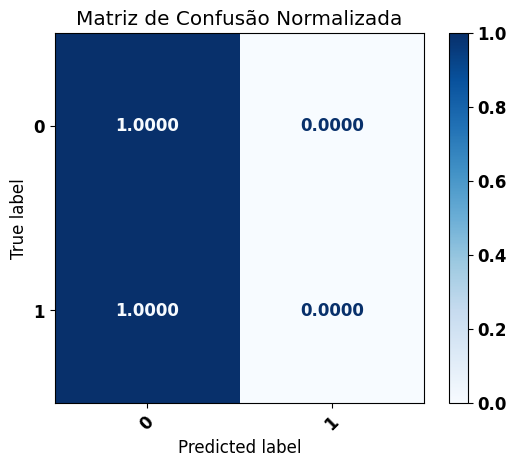


Relatório de Classificação:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     85706
           1       0.00      0.00      0.00     40938

    accuracy                           0.68    126644
   macro avg       0.34      0.50      0.40    126644
weighted avg       0.46      0.68      0.55    126644

-------------------------IBGE_DSLC----------------------------------
Model Score: 67.67%


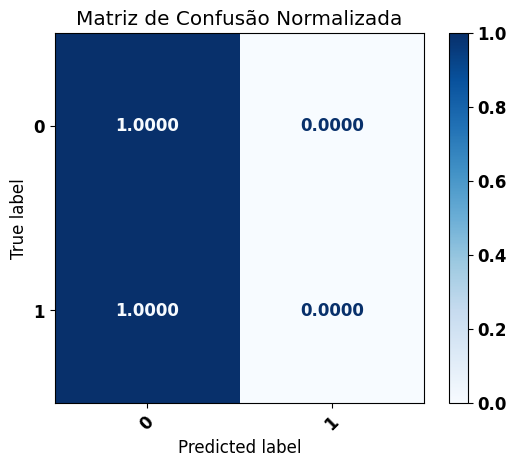


Relatório de Classificação:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.68      1.00      0.81     85706
           1       0.00      0.00      0.00     40938

    accuracy                           0.68    126644
   macro avg       0.34      0.50      0.40    126644
weighted avg       0.46      0.68      0.55    126644



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
colunas = [col for col in df_prox.columns if col not in ['ECGRUP_CAT', 'IBGEATEN', 'IBGE', 'RRAS_INST', 'RRAS']]

for coluna in colunas:
    X_train, X_test, y_train, y_test = train_test_split(df_prox[[coluna]], df_prox.ECGRUP_CAT, test_size=0.2, random_state=0)

    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)

    print(f'-------------------------{coluna}----------------------------------\nModel Score: {100*model.score(X_test, y_test):.2f}%')

    plot_confusion_matrix(model, X_test, y_test)